### Assignment - Advanced Regression

## Problem Statement - Part I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

#### Business Goal 


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


`````````` So following is the trail we are going to follow to get to the result ````````````


### Contents
1. Importing Libraries
2. Reading and Understanding data
    1. reading data
    2. dimensions check
    3. info check
    4. null check
    5. describing the statistical Summary of the DS
3. Data Cleaning
     1. Checking for the nulls
        - 1st check: entire row nulls
        - 2nd check: entire column nulls 
        - 3rd check: %of nulls
     2. Delting the cols with more than 15% of nulls
     3. Check for unique values less than 2
     4. droping 'ID' of the dataset
     5. dropping records containing the missing value
4. Data Preparation
    1. Creating derived features from YearBuilt, YearRemodAdd and GarageYrBlt
    2. Splitting the columns into numerical and categorical data fields
5. Perform EDA
    1. creating scatter plots (relationship b/w independent and dependent var)
    2. box plot for categorical vars
    3. check correlation 
6. Create Dummy Variables 
7. Data Prep and Modelling
    1. Outlier handling
    2. Test and train data - standard scalar
    3. Model building - simple regression model
    4. Model building - Ridge regression
    5. Model building  -Lasso regrssion 
6.  Coming to Conclusions 



The assignmemnt part1 covers: 
- Data Understanding:
- data quality checks
- Issues mentioned
- Explainatrion to issues
- Categorical Variables are handled
- Model Building and Evaluation
- Model Parameters tuned
- Approach explained


### 1. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

#### 2. Reading and understanding data

> 2.1. Reading the dataset


In [3]:
house_df = pd.read_csv("train.csv")
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# 2.2. Dimenstion of dataset
print(house_df.shape)

# 2.3. info about dataset
print(house_df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

> 2.4. Checking null values

In [5]:
nullcols=house_df.columns[house_df.isnull().sum() != 0]
house_df[nullcols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

***As we can see, we have some of null values available in the dataset.***
***

> 2.5. describing the statistical Summary of the DS

In [6]:

house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### 3. Data Cleaning

 - Checking for the nulls
    - 1st check: entire row nulls
    - 2nd check: entire column nulls 
    - 3rd check: %of nulls
 - Delting the cols with more than 15% of nulls
 - Check for unique values less than 2
 - droping 'ID' of the dataset
 - dropping records containing the missing value

In [7]:
# Row
house_df.isnull().all(axis=1).sum()

0

In [8]:
# Column
house_df.isnull().all(axis=0).sum()

0

In [9]:
#percentage check
round(100 * house_df.isnull().sum()[(house_df.isnull().sum() > 0 )] / len(house_df), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [10]:

for column in house_df.columns:
    if round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2) > 15:
        print(column +" " + str(round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2)))

LotFrontage 17.74
Alley 93.77
FireplaceQu 47.26
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


***we will handle those which columns are having more than 15% null Values***

In [11]:
house_dc1 = house_df.drop(house_df.loc[:,list(round(100 * (house_df.isnull().sum()/len(house_df.index)),2) > 15)].columns,1)

> checking nulls now in new df- house_dc1

> percentage check

In [12]:
round(100 * house_dc1.isnull().sum()[(house_dc1.isnull().sum() > 0 )] / len(house_dc1), 2)

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [13]:
unique_values = house_dc1.nunique()
unique_values[unique_values < 2]

Series([], dtype: int64)

> 3.1 Dropping the 'Id'

In [14]:
house_dc2= house_dc1.drop(['Id'], axis=1)
house_dc2.shape

(1460, 74)

> 3.5. As the percentage of missing values is low
> The records containing the missing values can be dropped

In [15]:

house=house_dc2.dropna(axis=0)
print(house.shape)

(1338, 74)


In [16]:
house[house.columns[house.dtypes == object] ].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

In [17]:
# Handling the datatyepe
house['GarageYrBlt'] = house['GarageYrBlt'].astype('int64')
house.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 74 columns]

In [18]:
x = house.columns[house.dtypes == object]
x

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### 4. Data Preparation 
> 4.1. Creating derived features from YearBuilt, YearRemodAdd and GarageYrBlt
> Getting the difference between the current year and the year specified by the records


In [19]:
house['YearBuilt_Diff'] = pd.datetime.now().year - house['YearBuilt']
house['YearRemodAdd_Diff'] = pd.datetime.now().year - house['YearRemodAdd']
house['GarageYrBlt_Diff'] = pd.datetime.now().year - house['GarageYrBlt']


> 4.2. Splitting the columns into numerical and categorical data fields on the basis of the provided **data dictionary.**
***

[This is the link to the Data Dictionary ](https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt)

***

#### Numerical Columns

In [20]:
numerical_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', 'MiscVal', 'YearBuilt_Diff', 'YearRemodAdd_Diff', 'GarageYrBlt_Diff',
                  'SalePrice']
len(numerical_cols)

31

#### Categorical Columns

In [21]:
categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                    'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

len(categorical_cols)

43

### 5. Perform EDA

> Creating scatterplots to understand the relationship between the independent and the dependent variable.

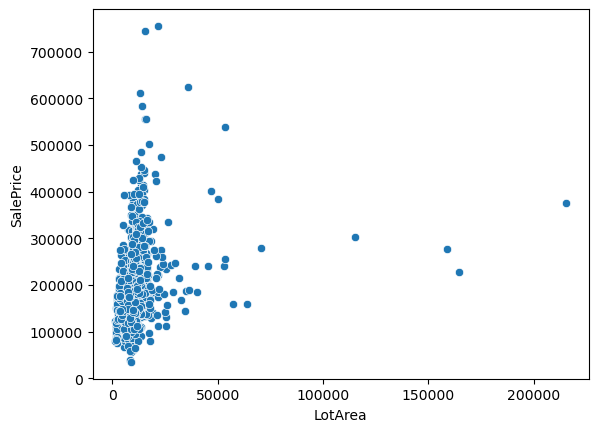

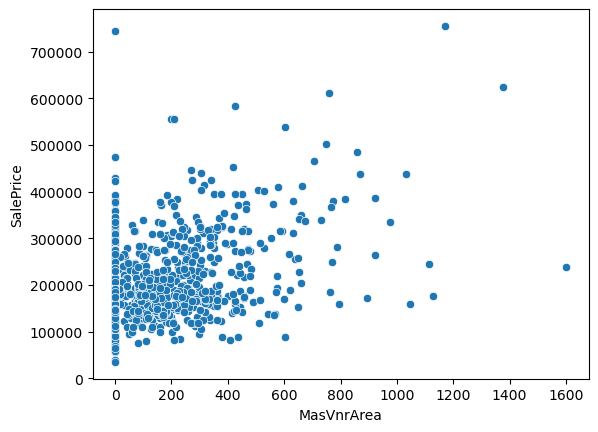

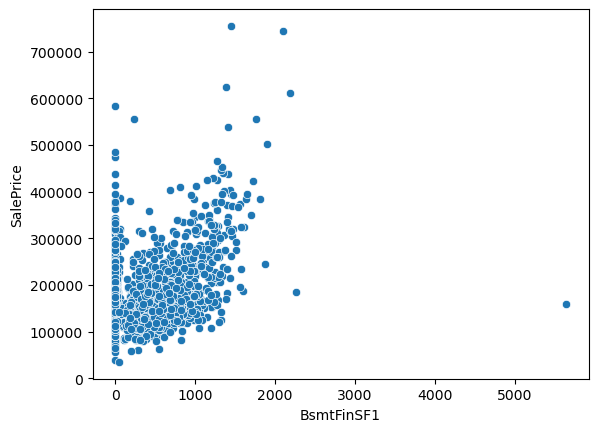

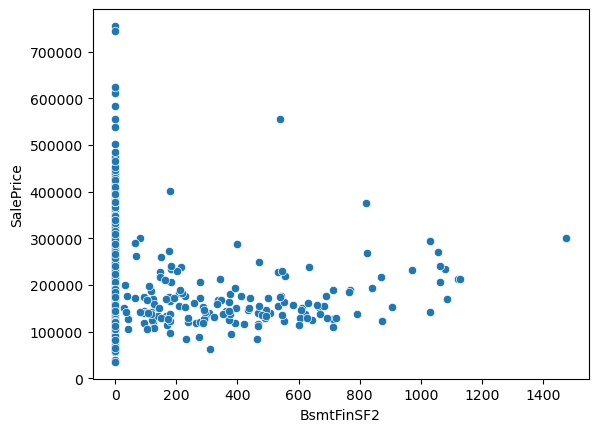

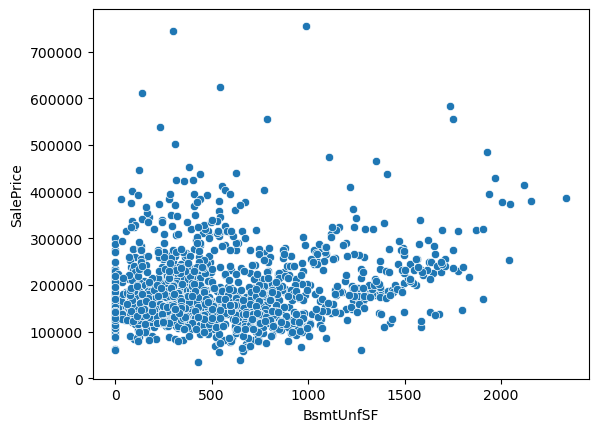

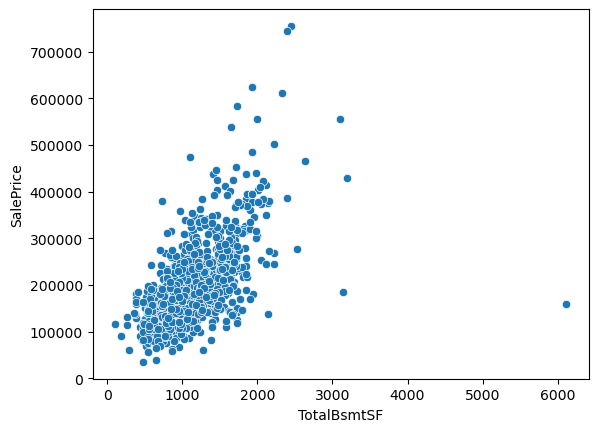

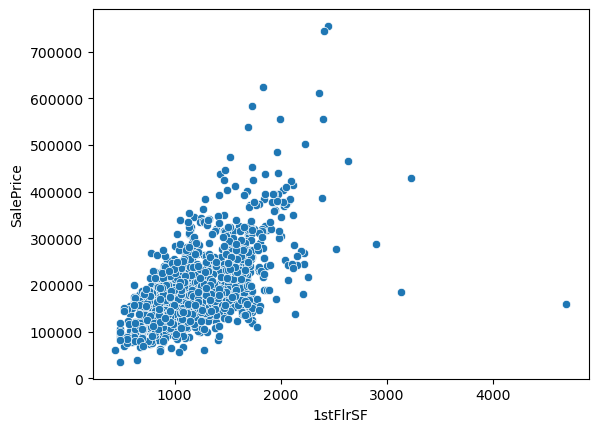

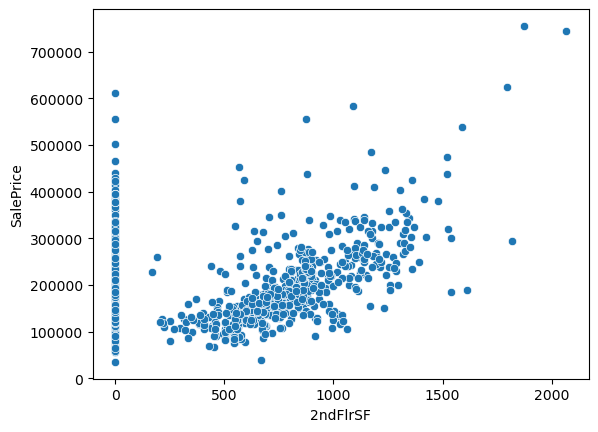

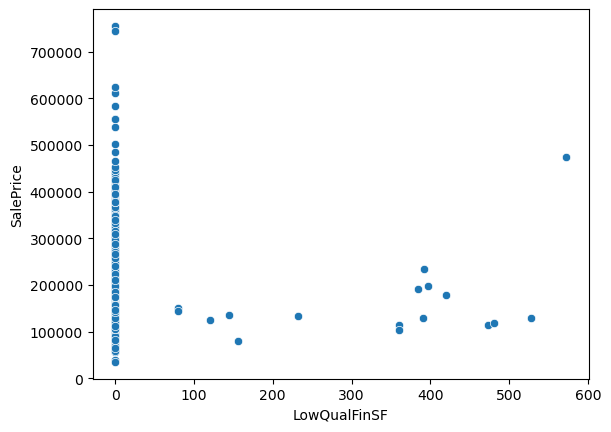

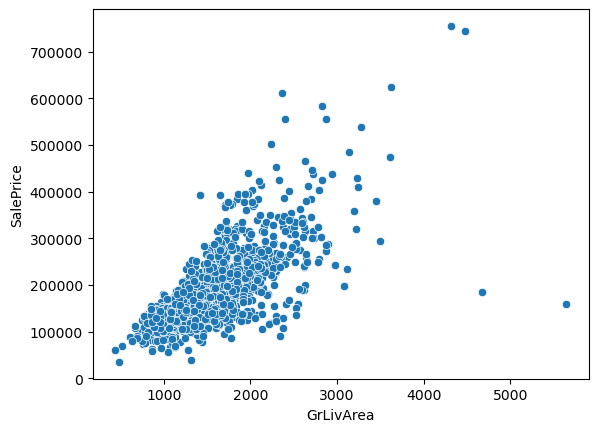

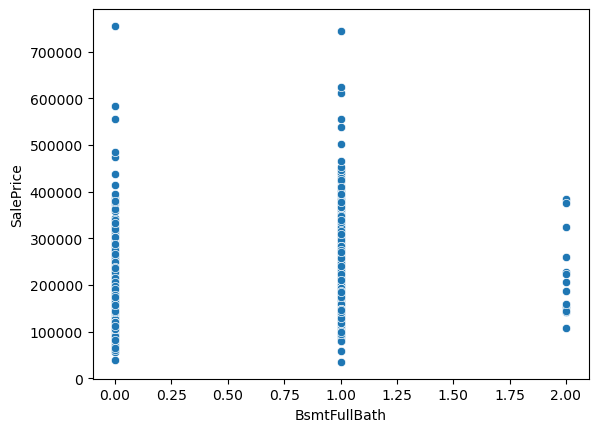

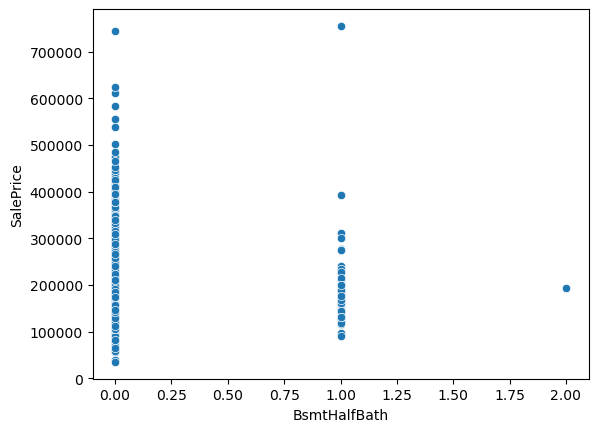

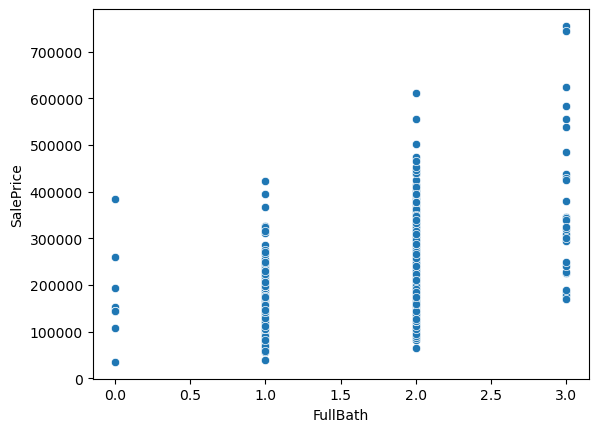

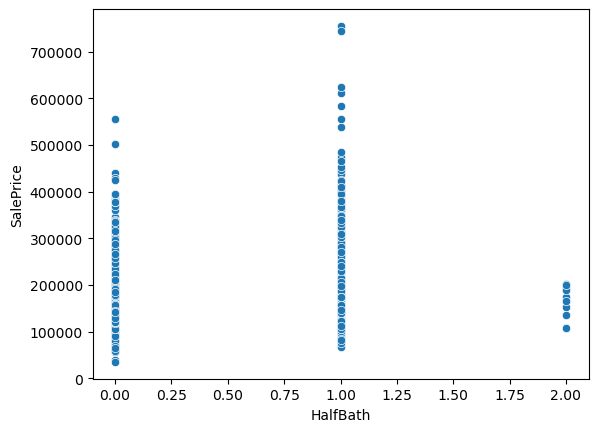

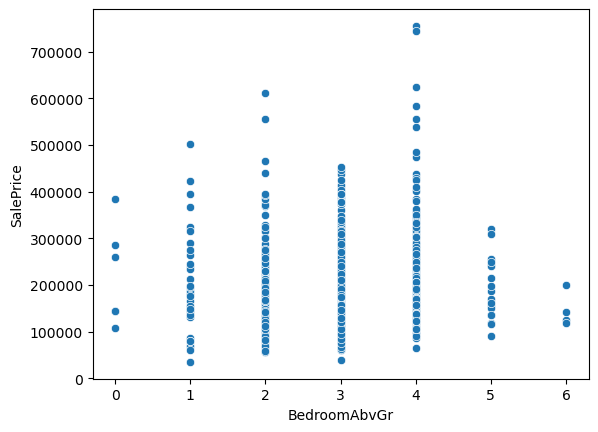

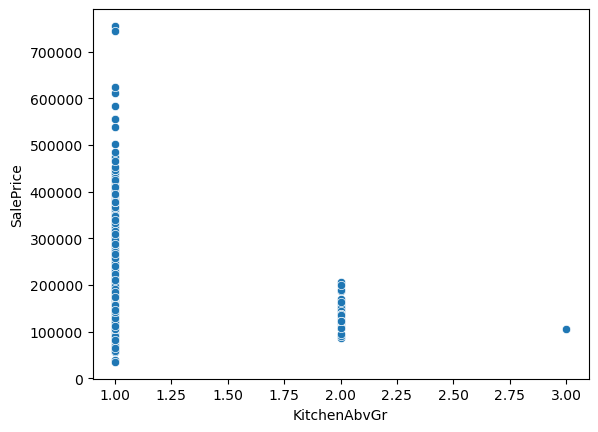

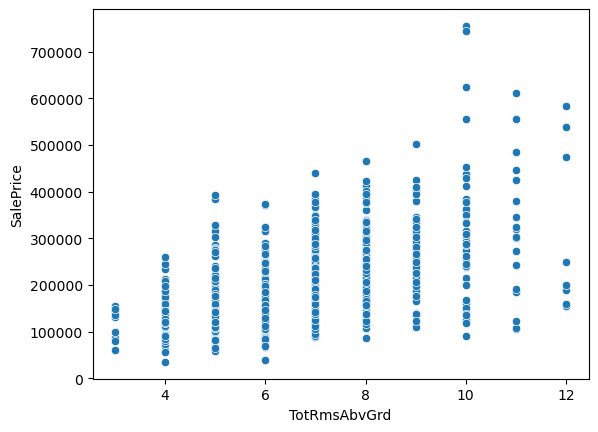

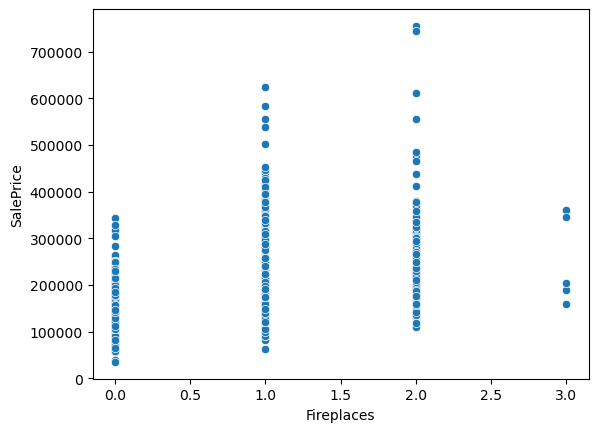

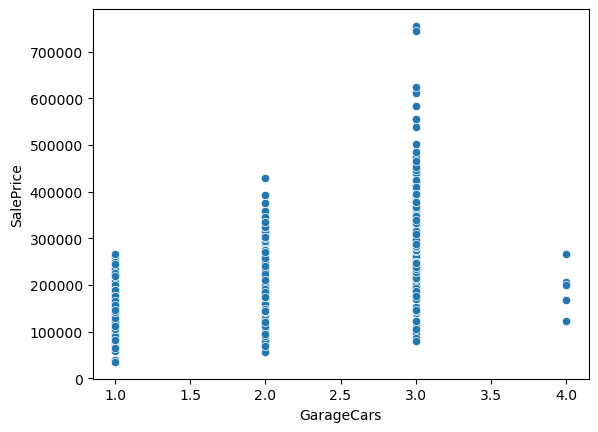

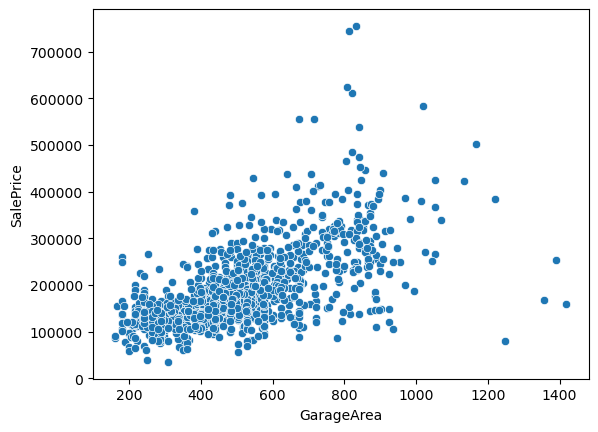

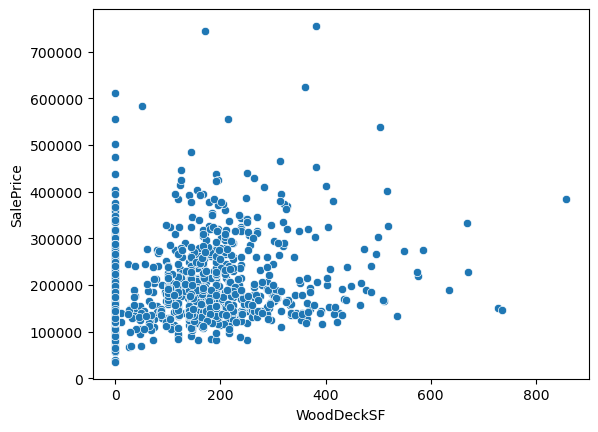

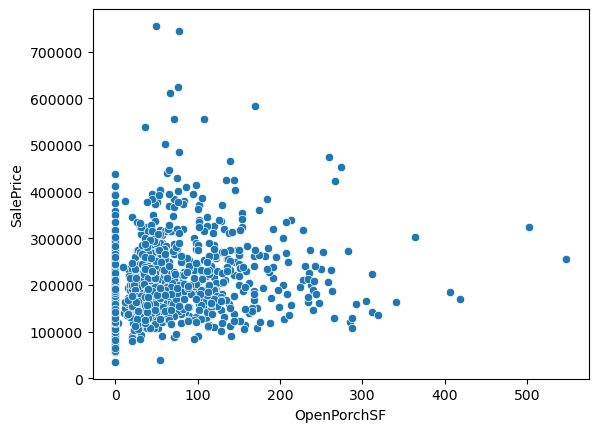

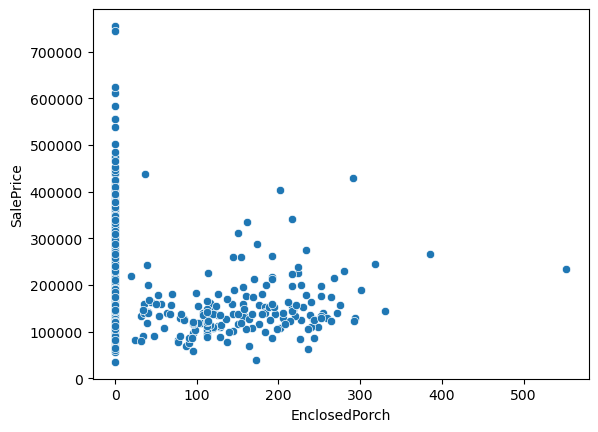

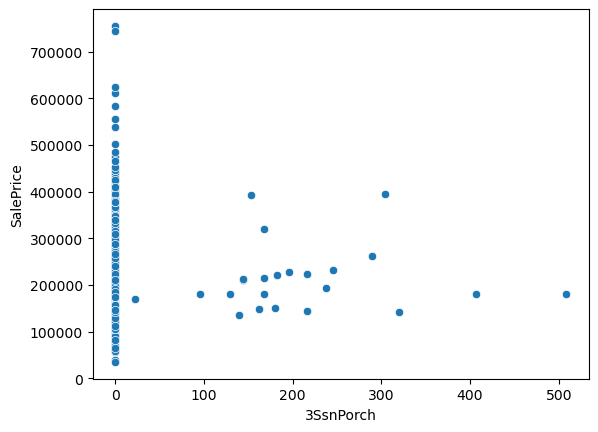

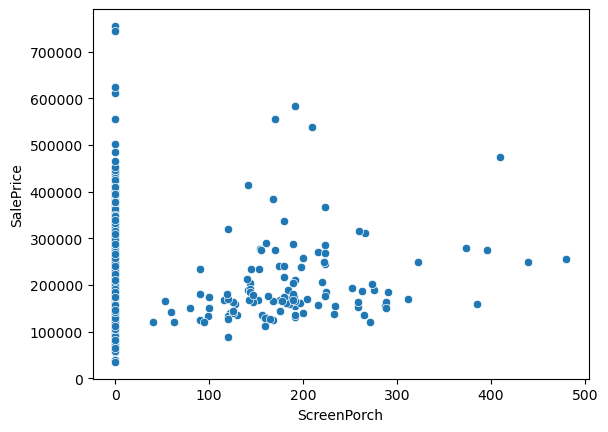

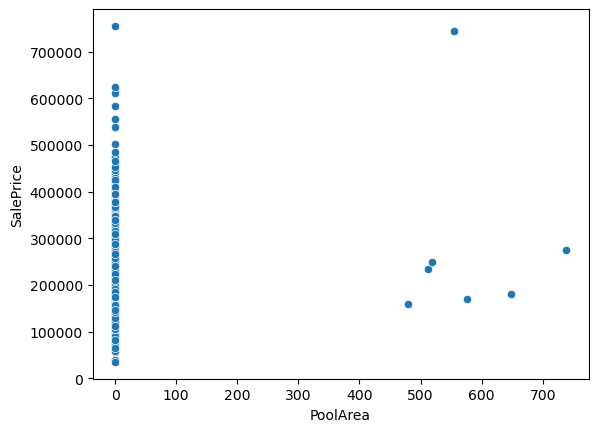

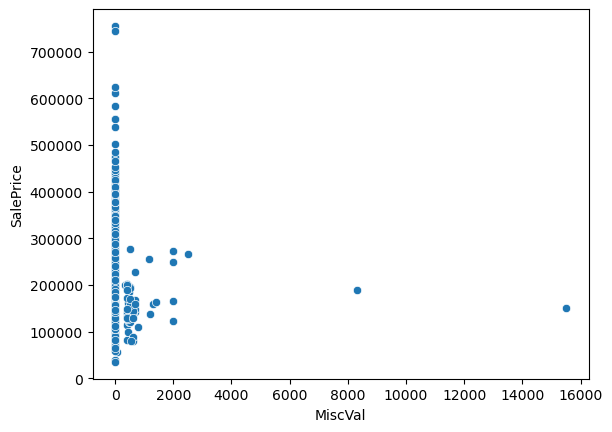

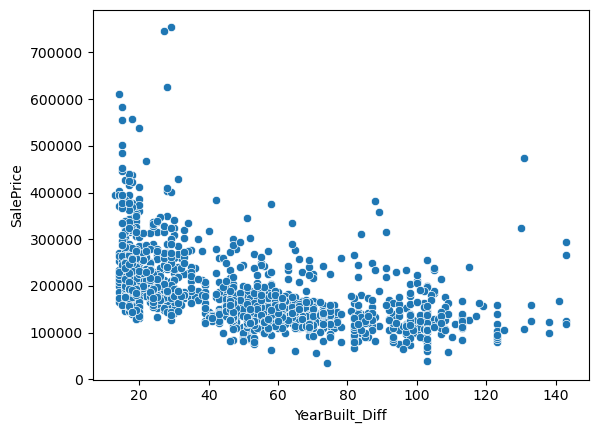

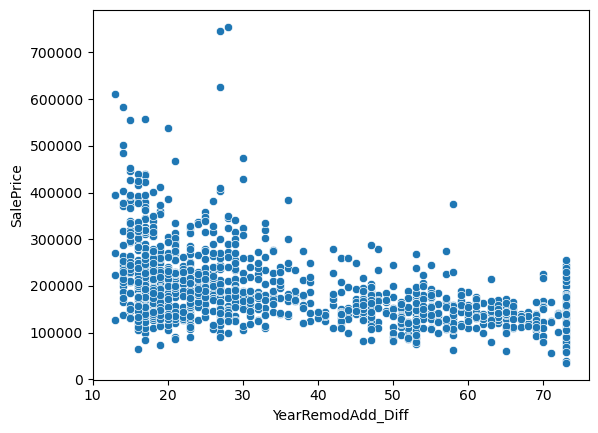

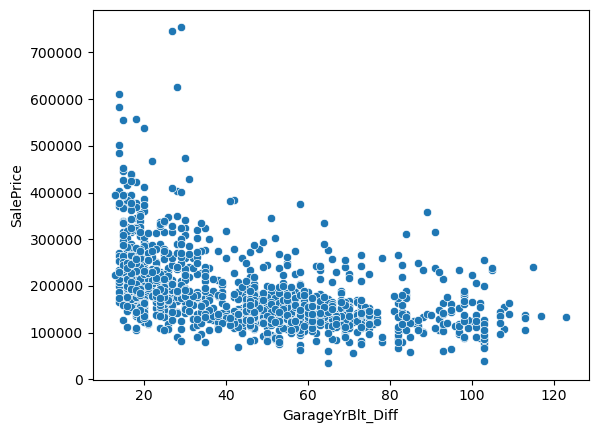

In [22]:
### for the numeric columns

for col in numerical_cols[:-1]:  # Excluding the 'SalePrice' column
    sns.scatterplot(x=col, y='SalePrice', data=house)
    plt.show()

- From the above- you may notice multiple variables show a linear trend with the 'SalePrice' variable.
- Posibility of using Regression Model - Acceptable


> Creating boxp lots for the categorical variables

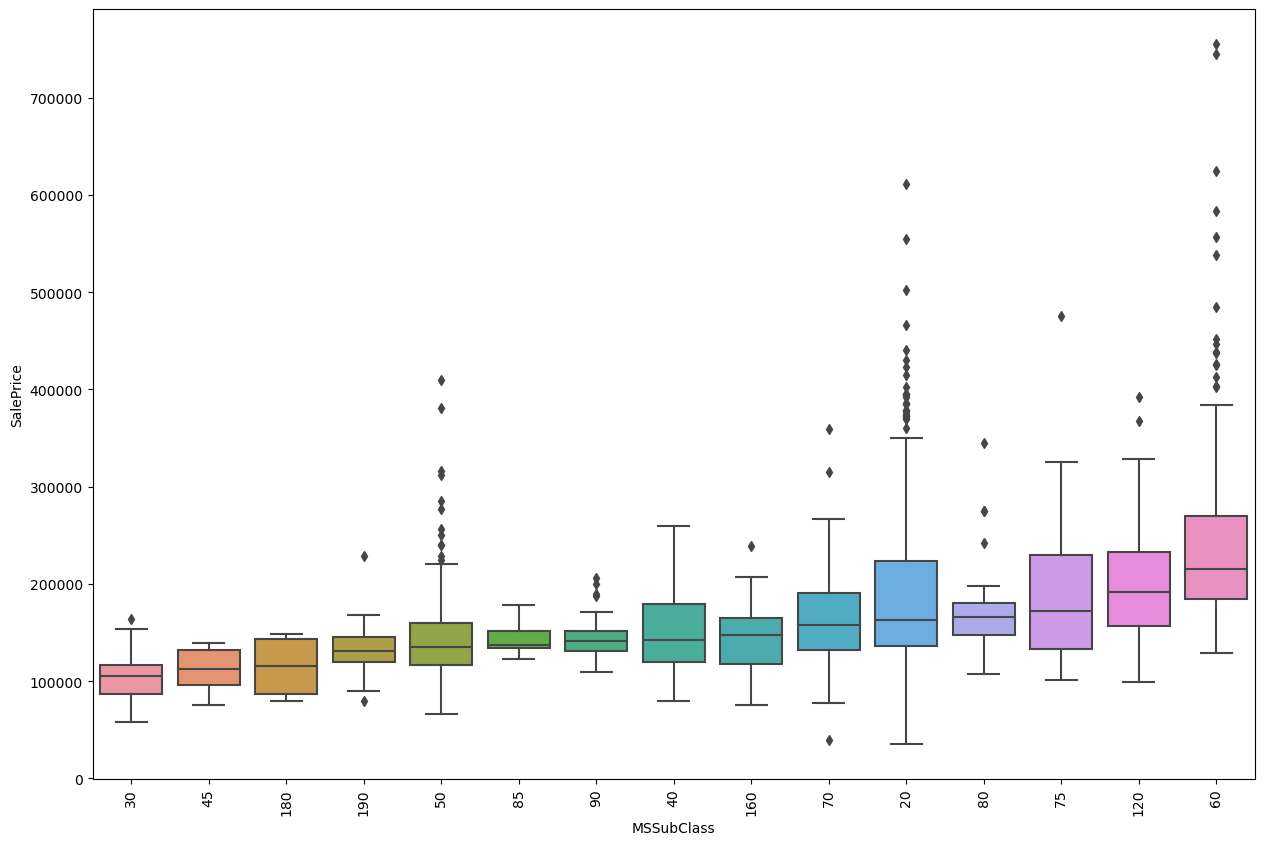

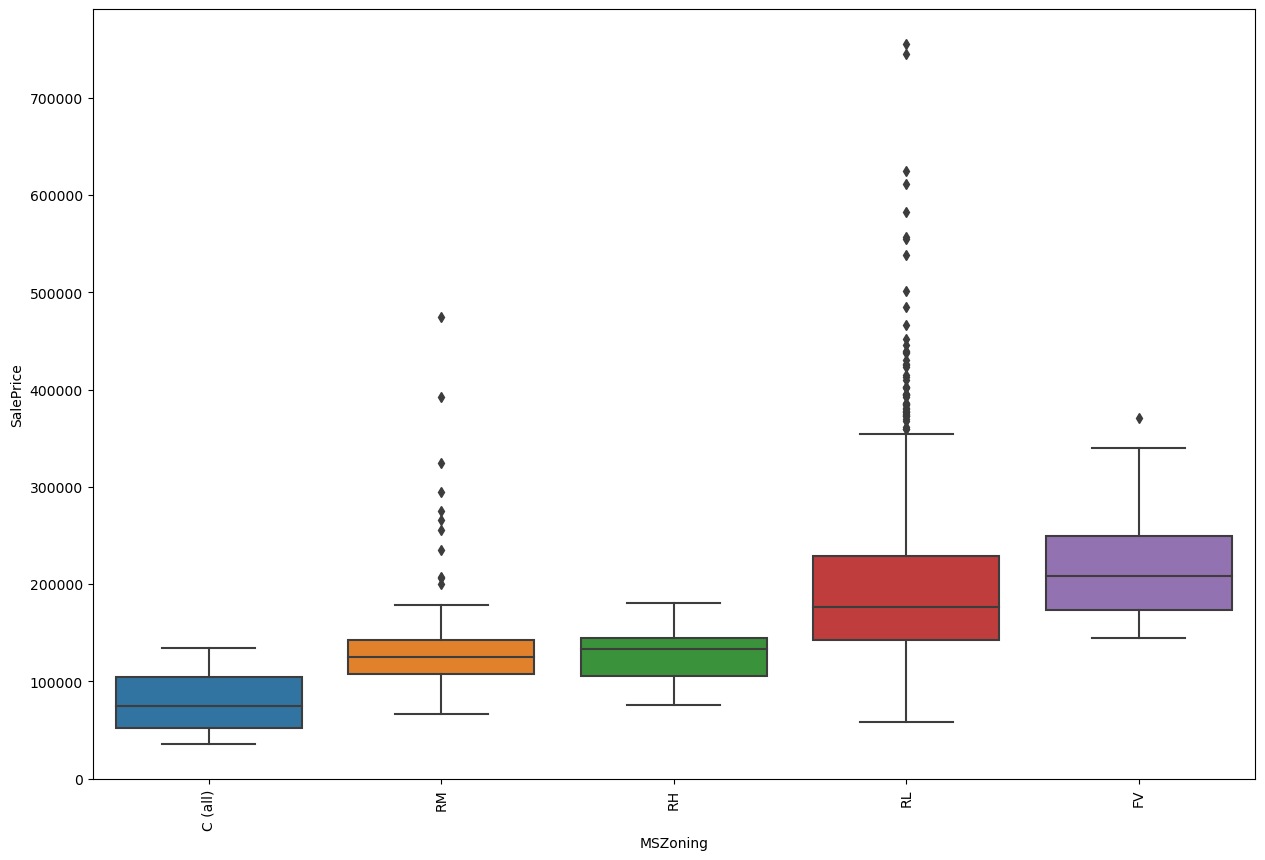

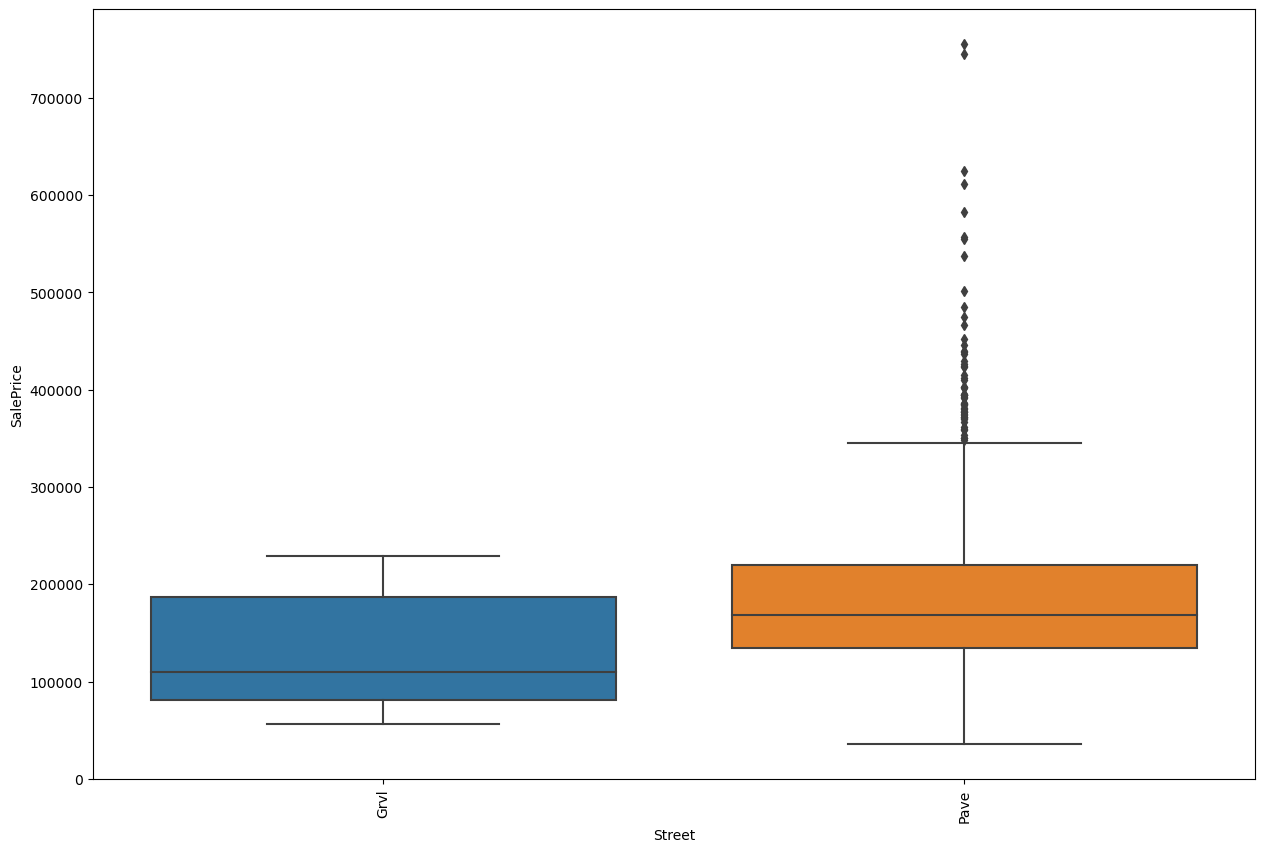

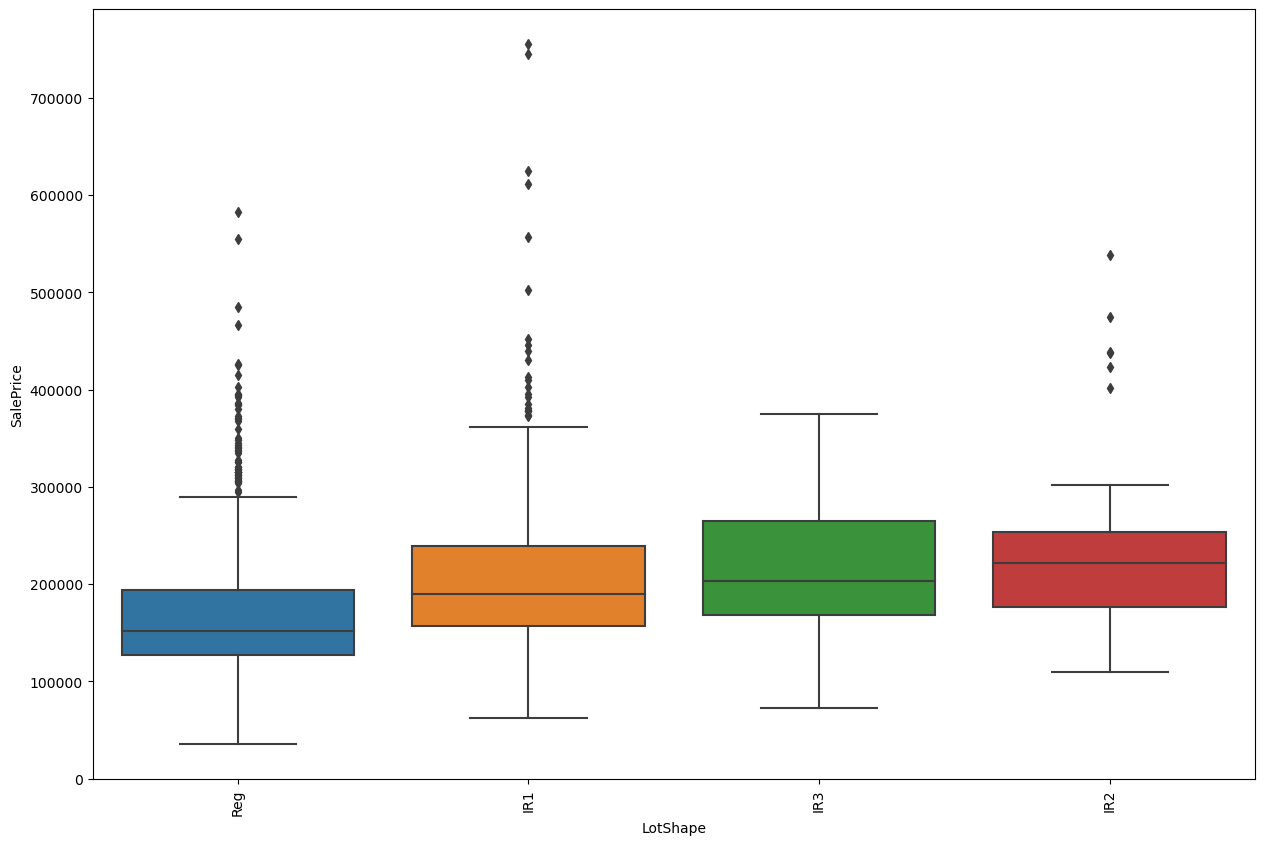

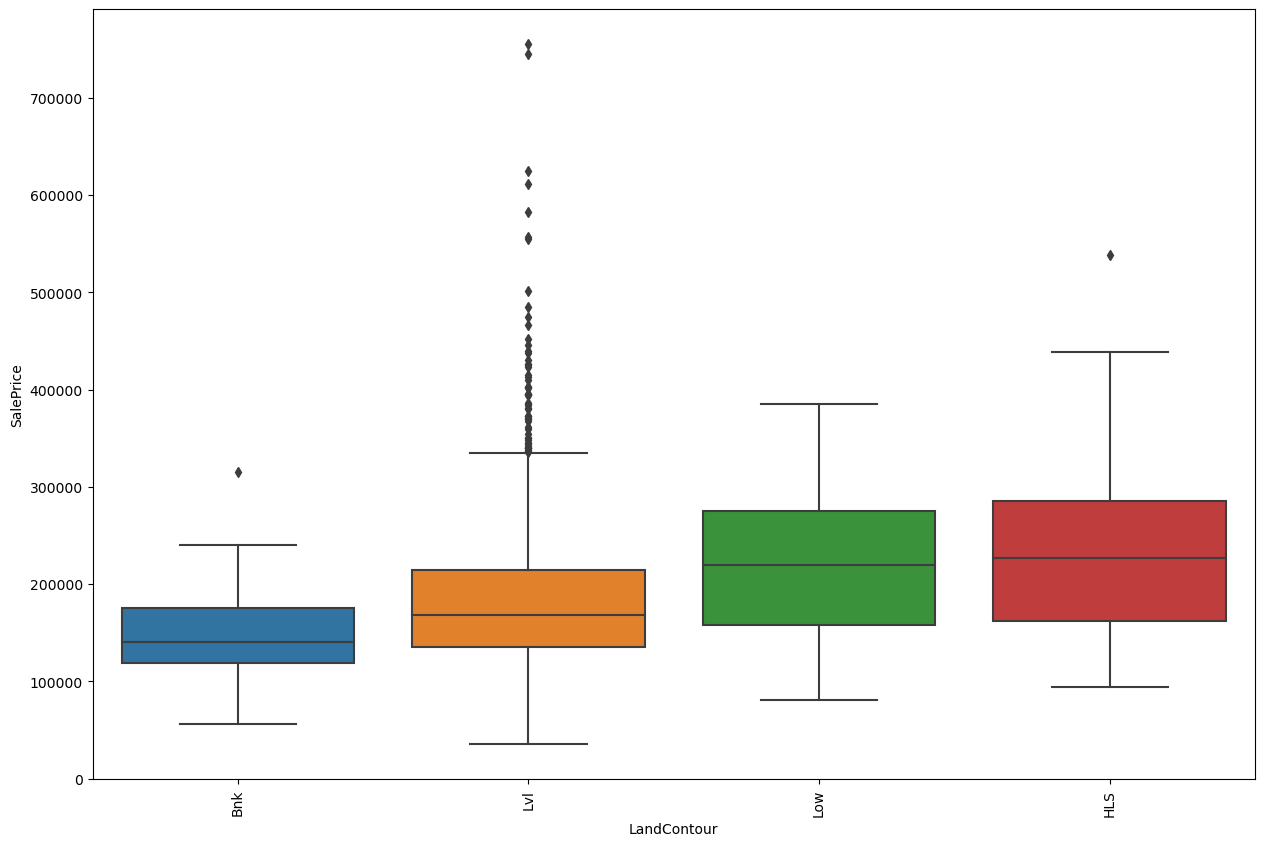

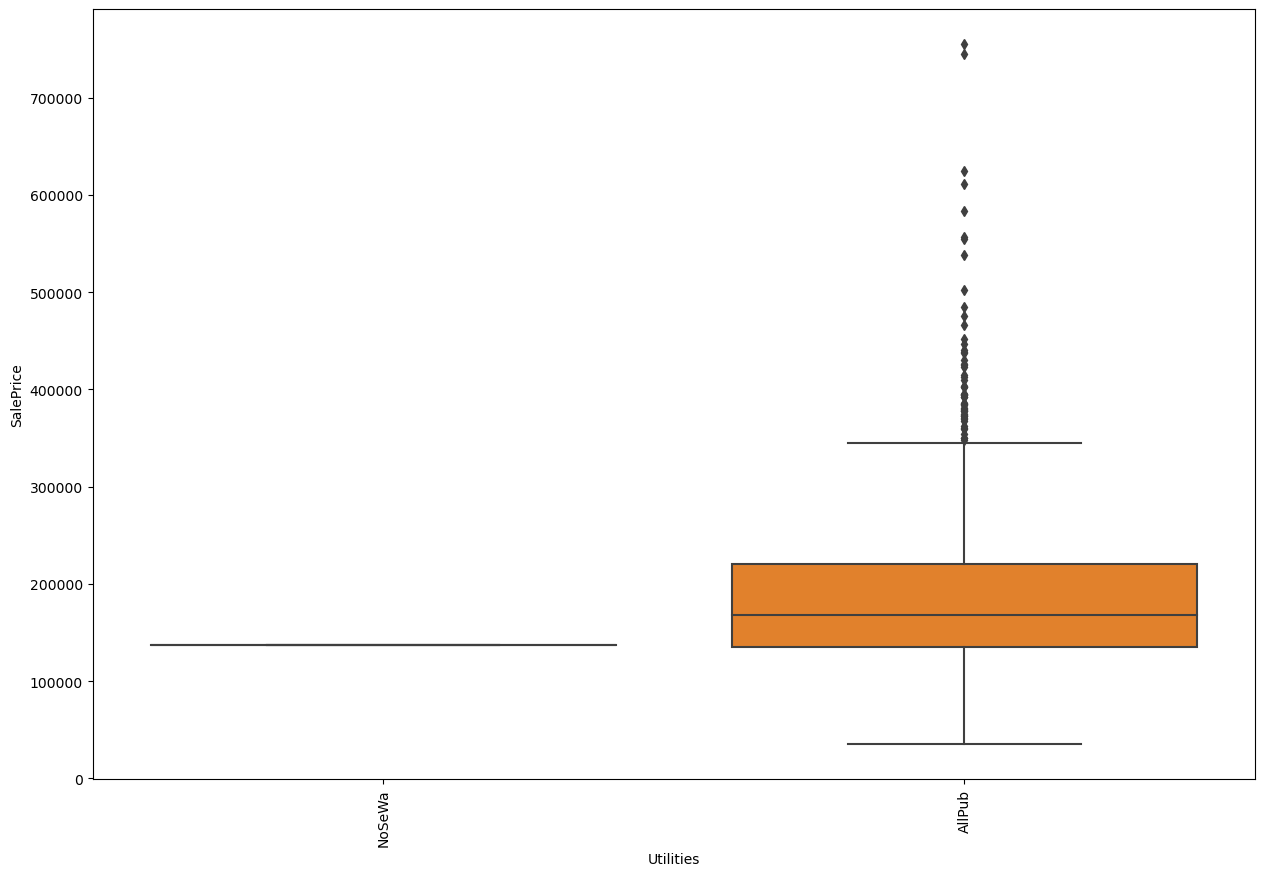

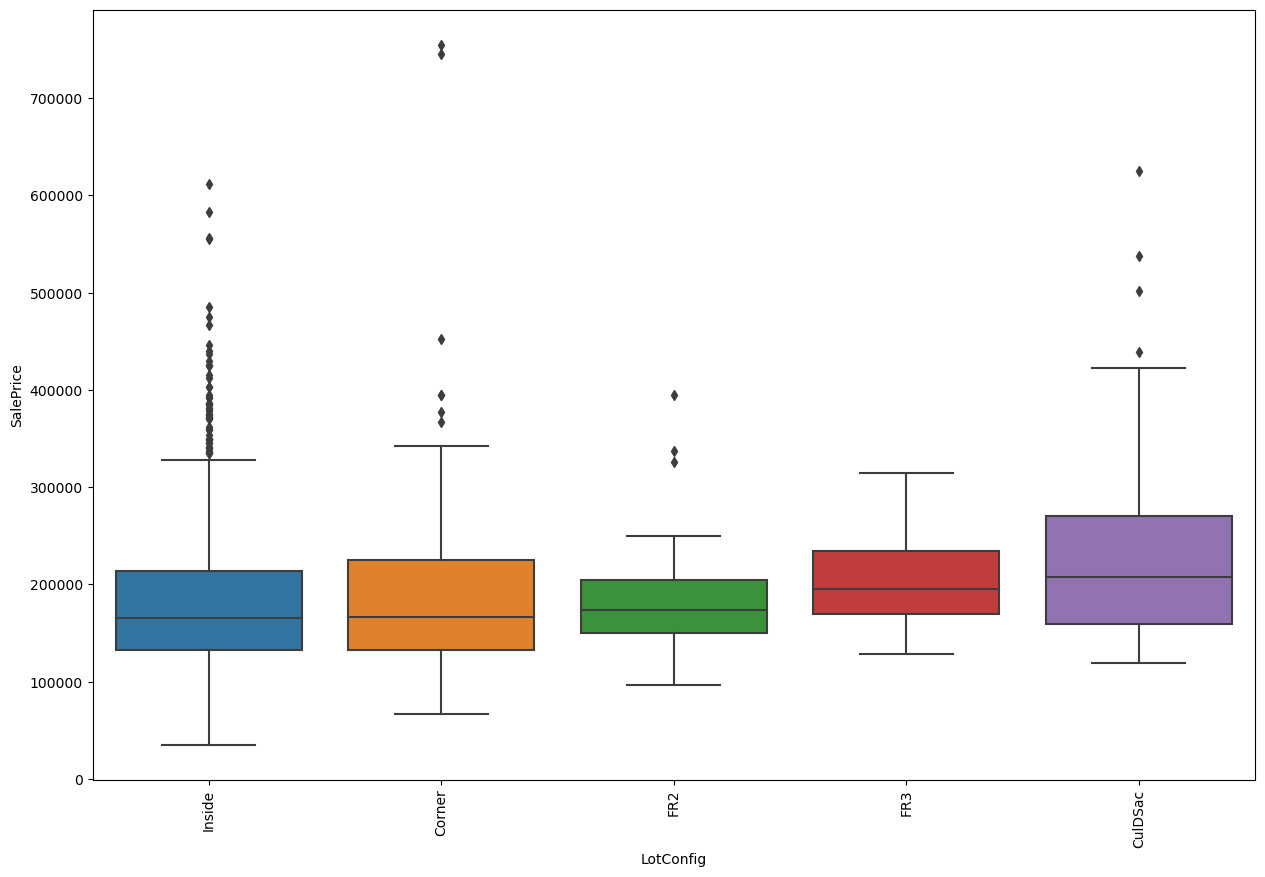

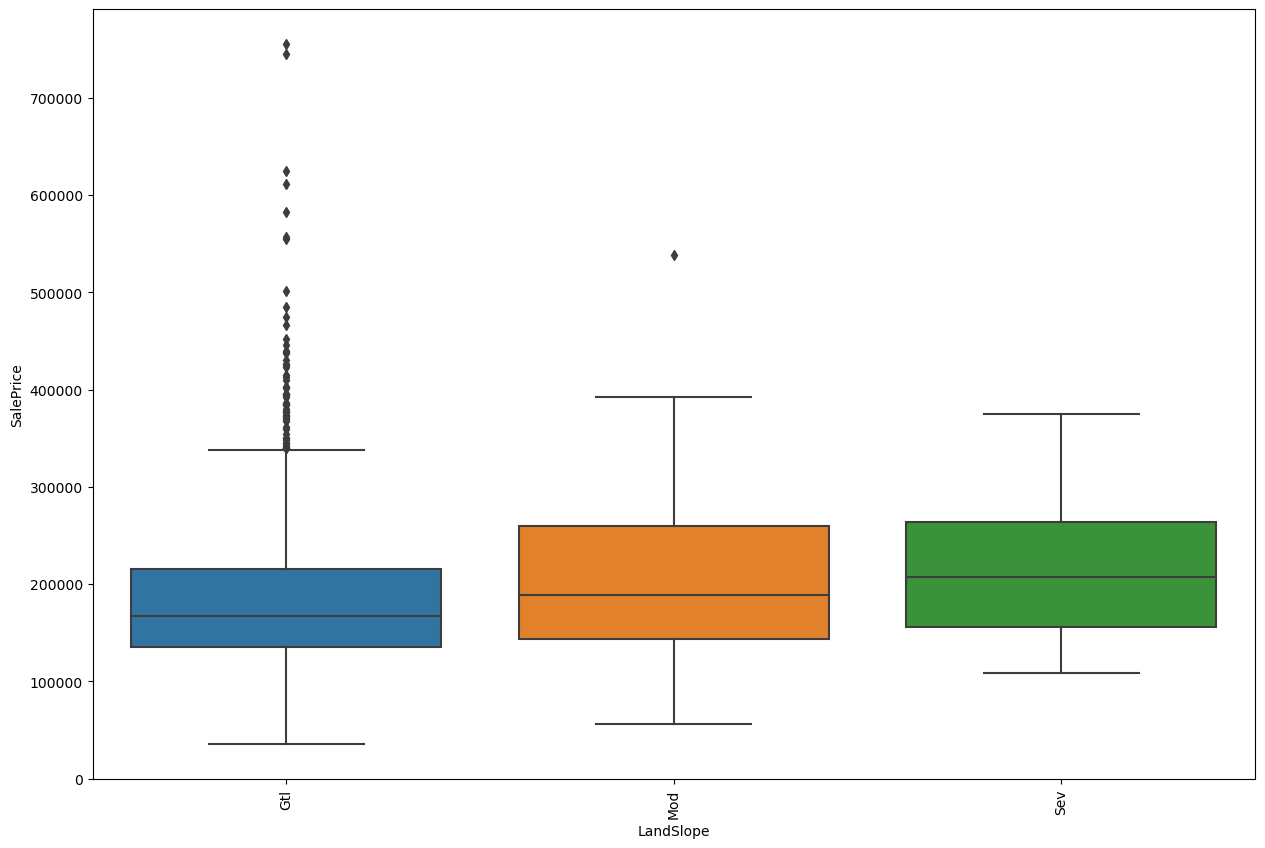

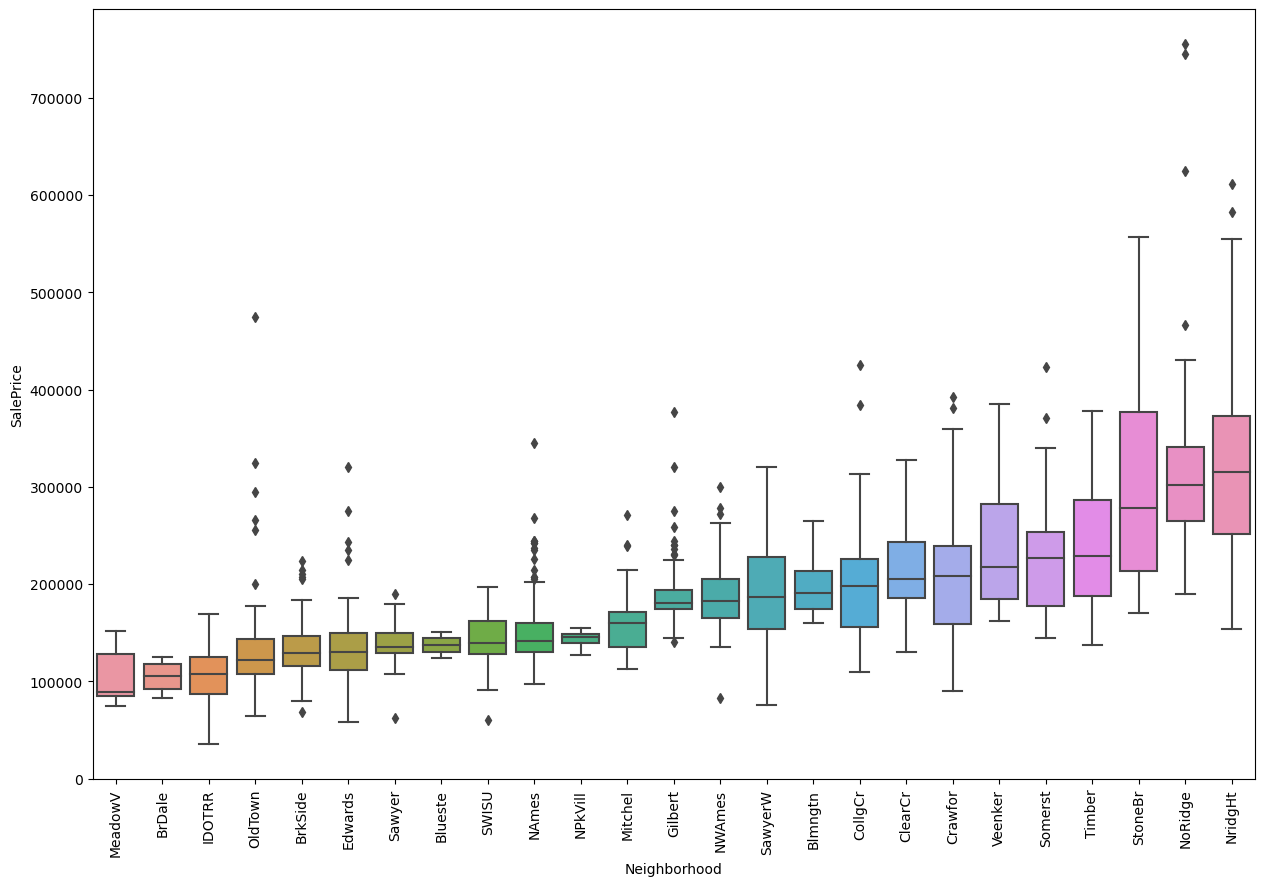

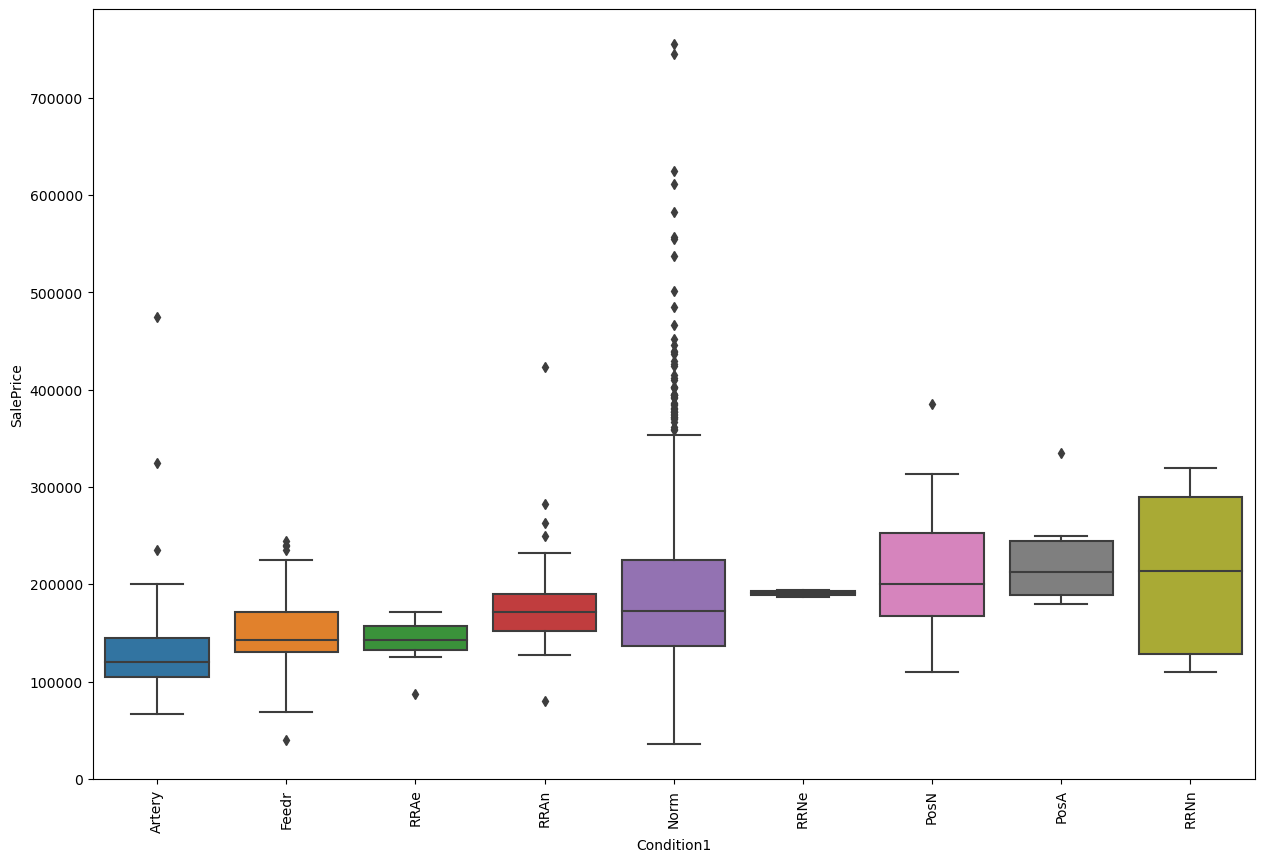

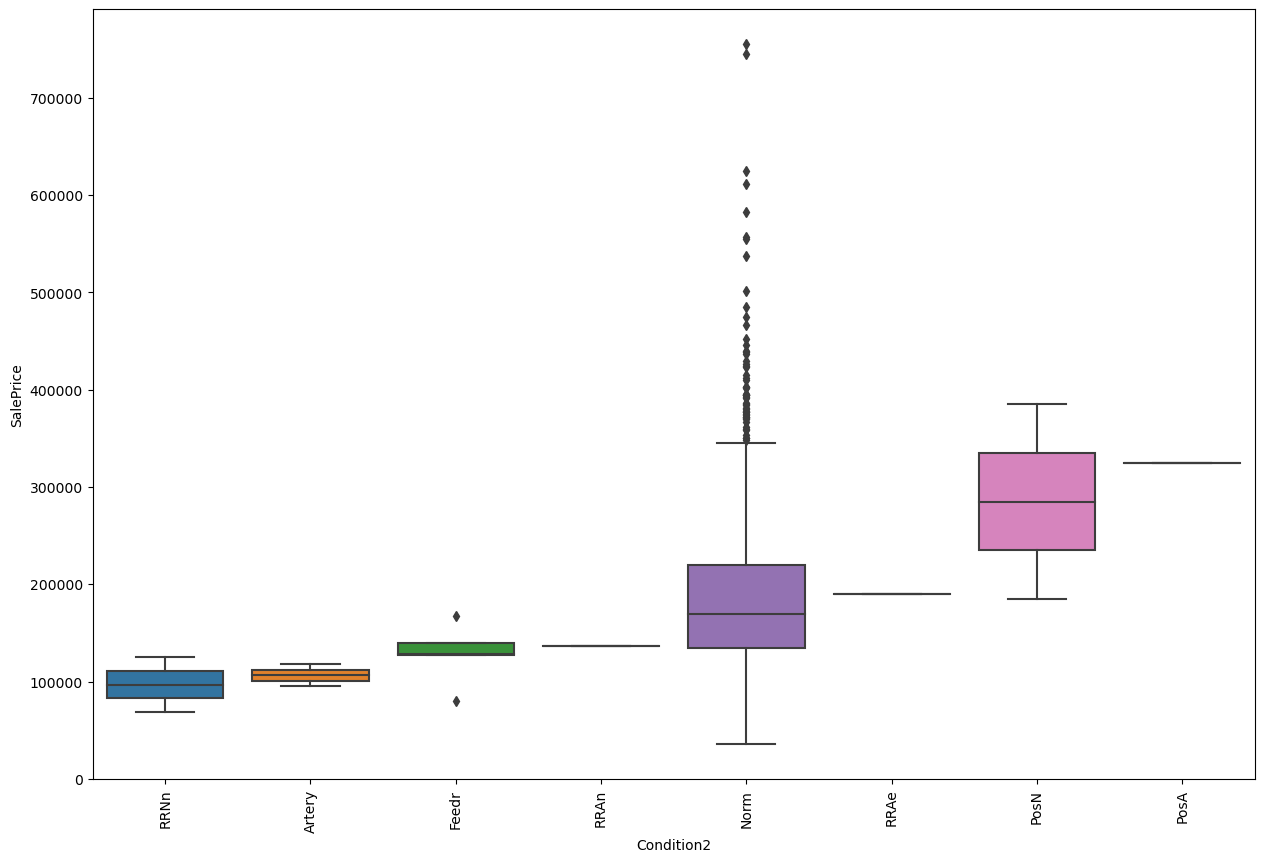

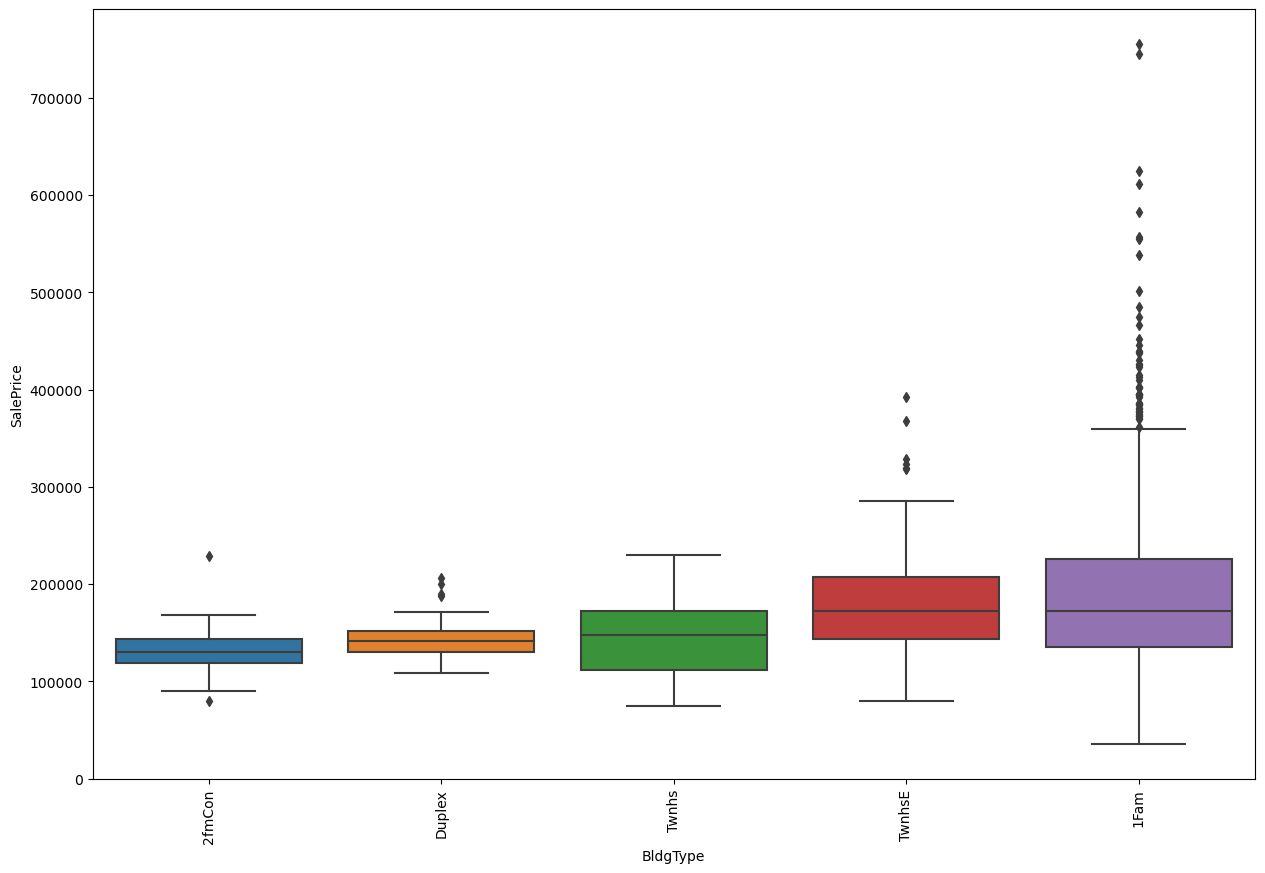

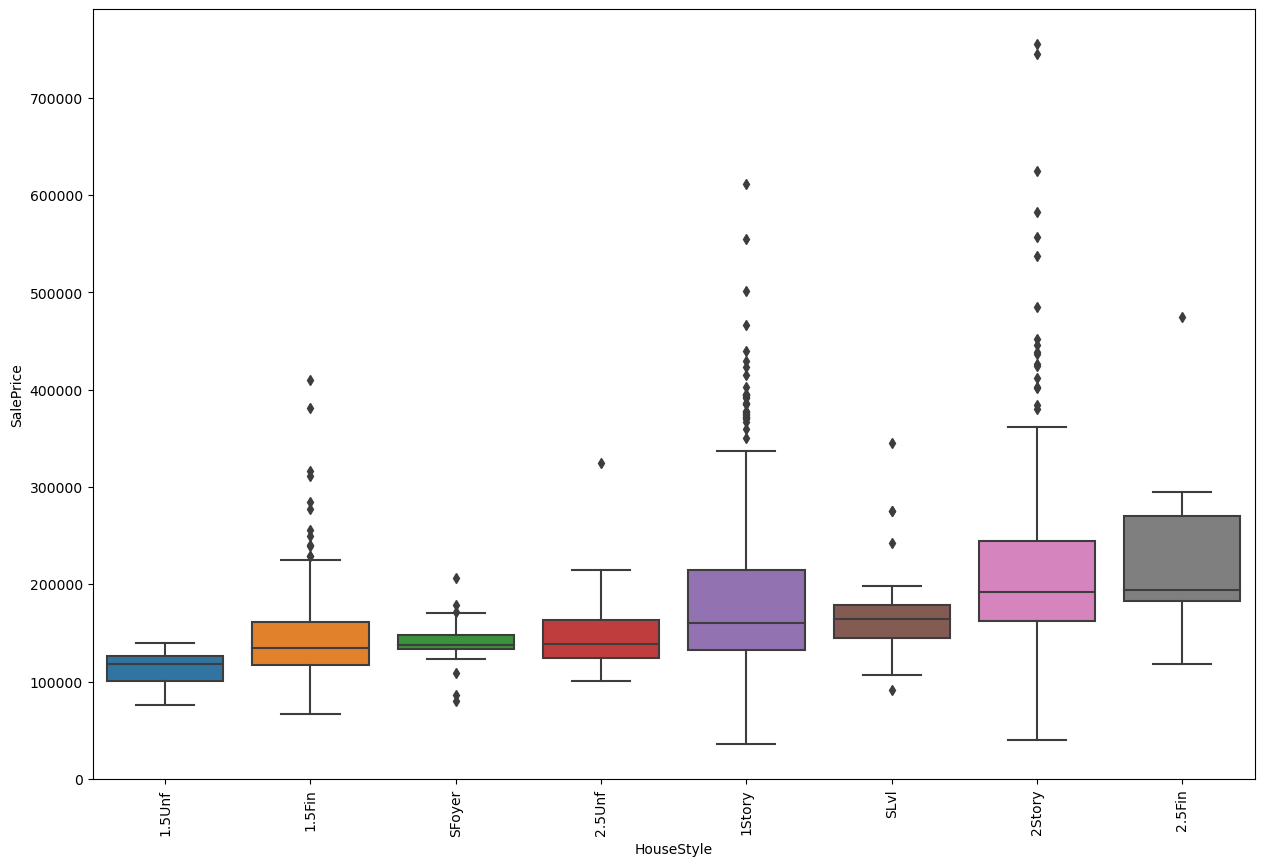

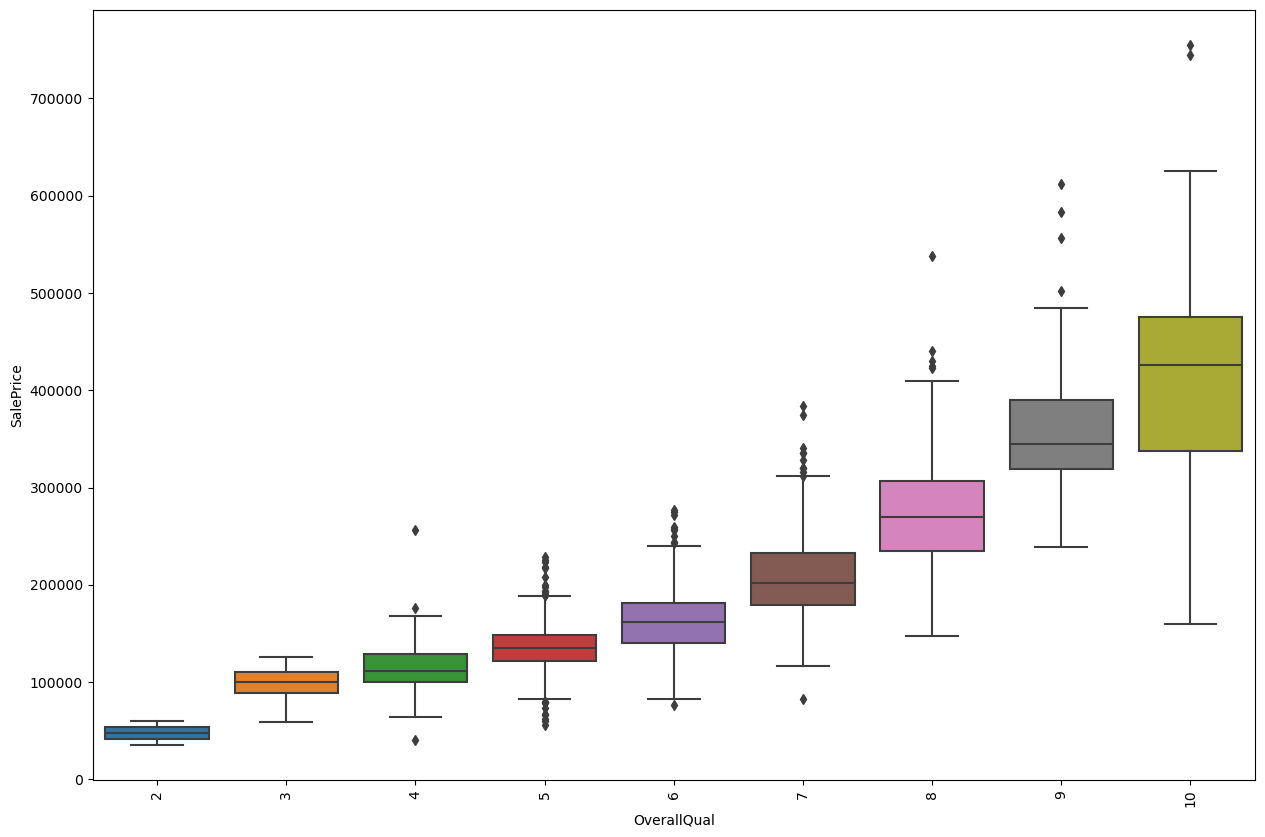

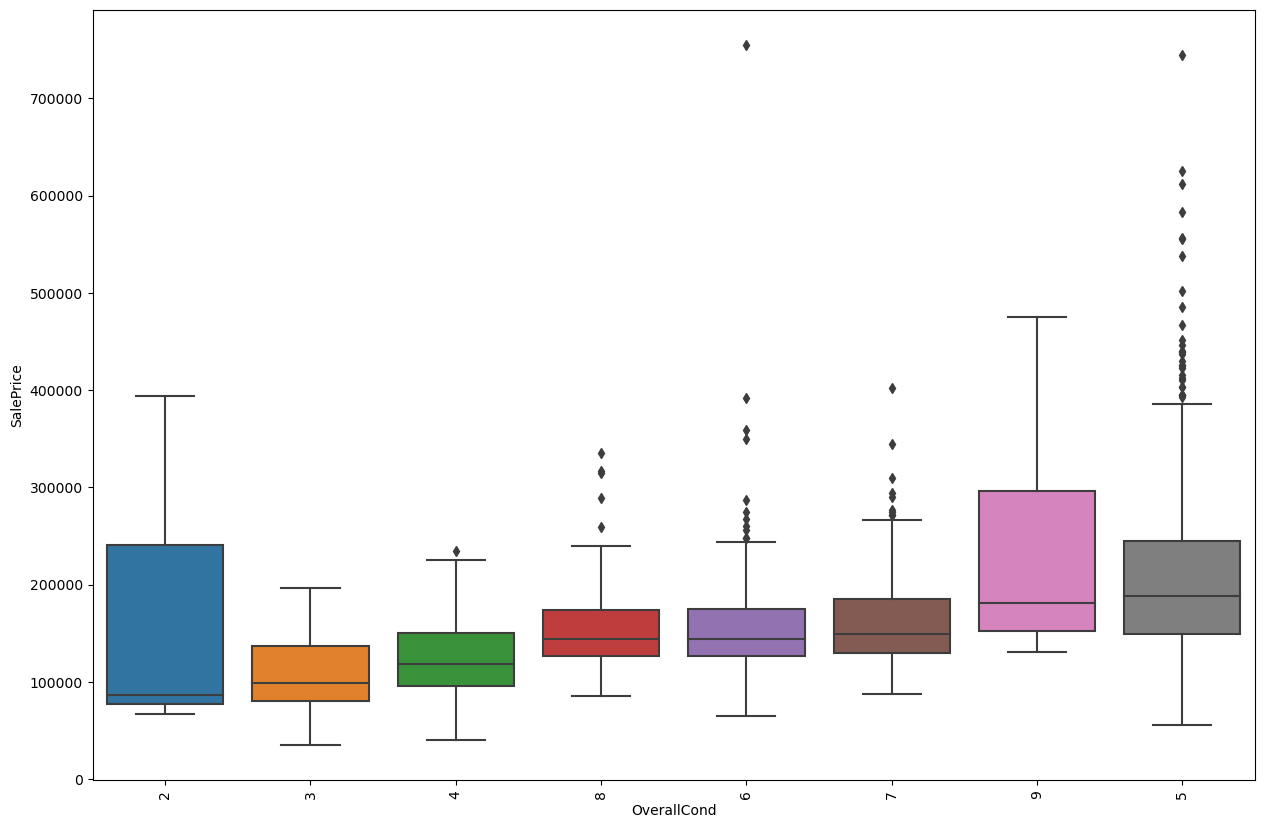

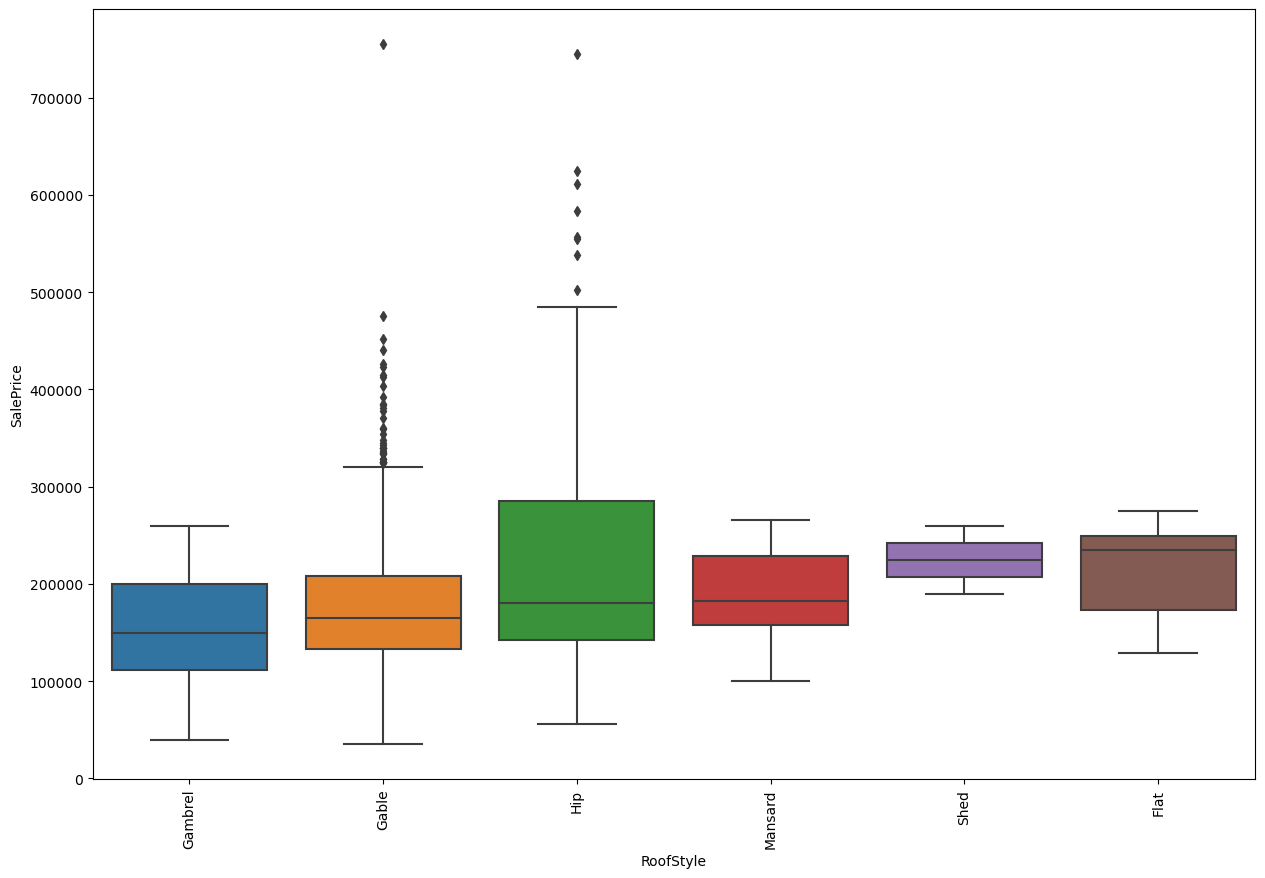

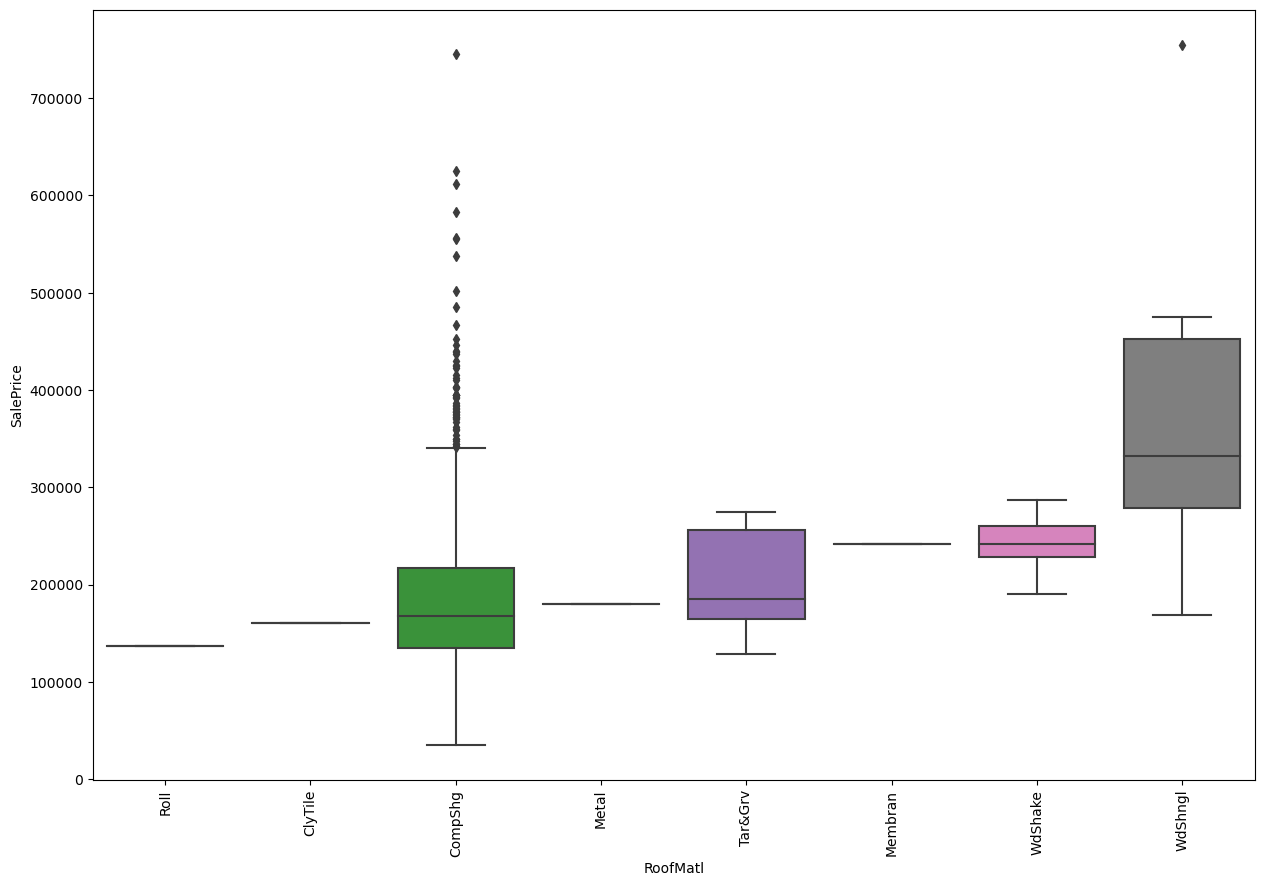

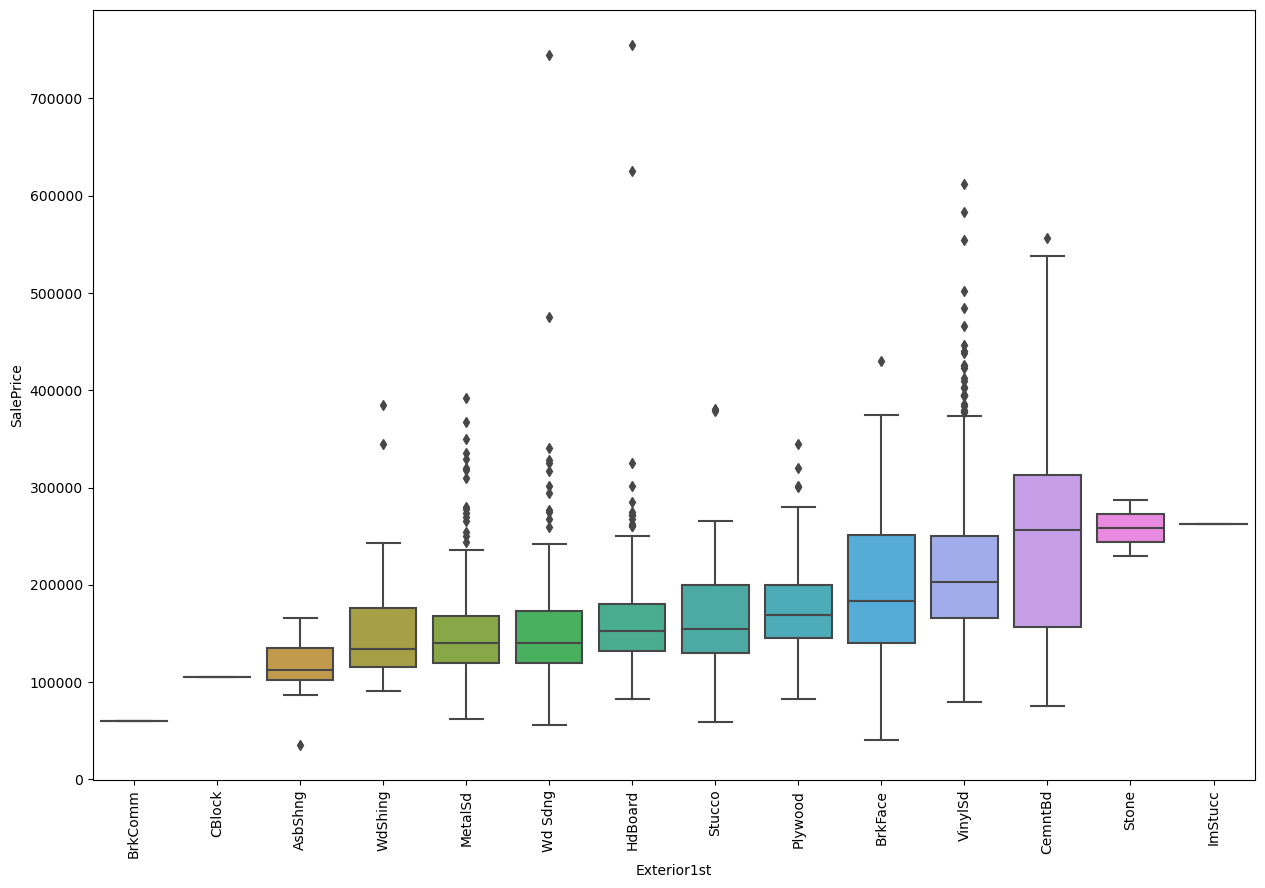

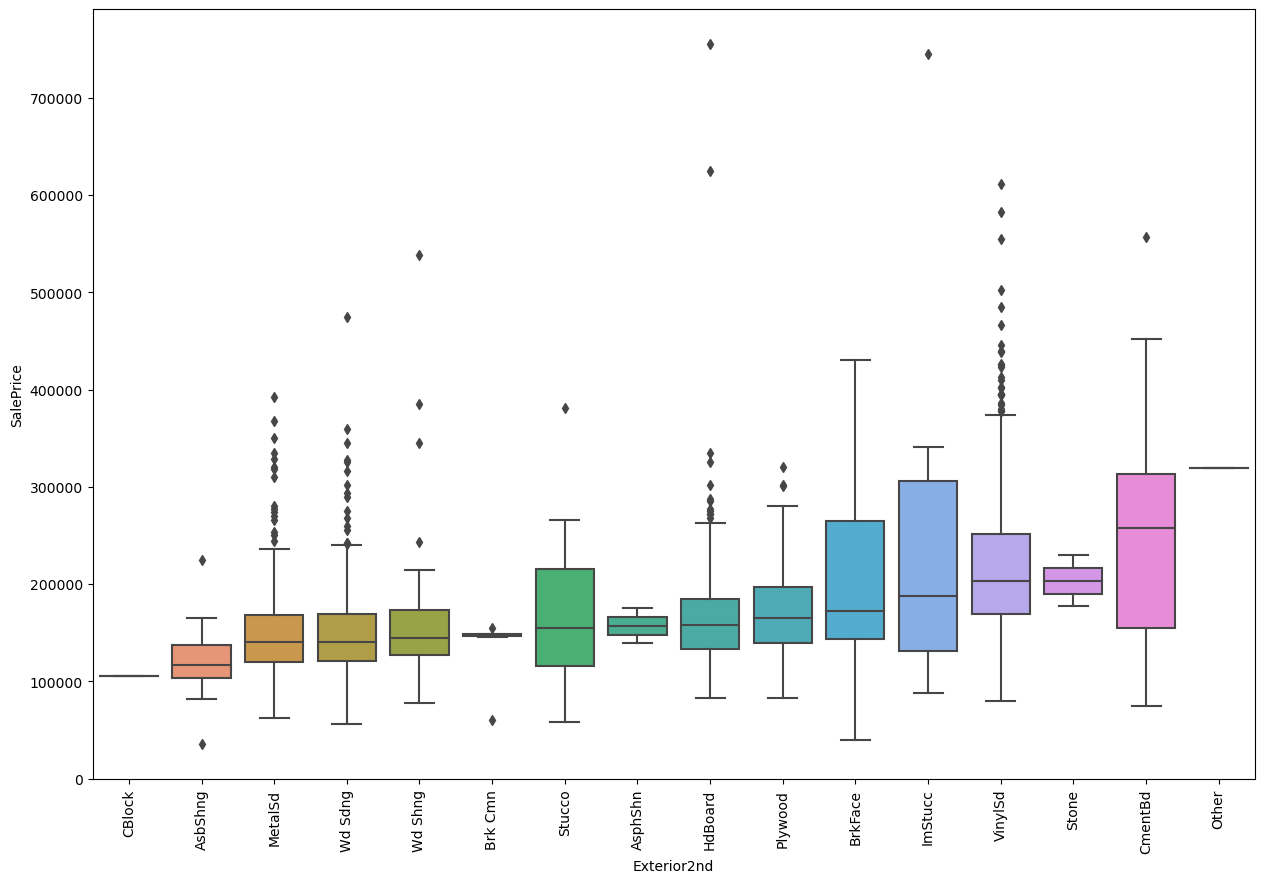

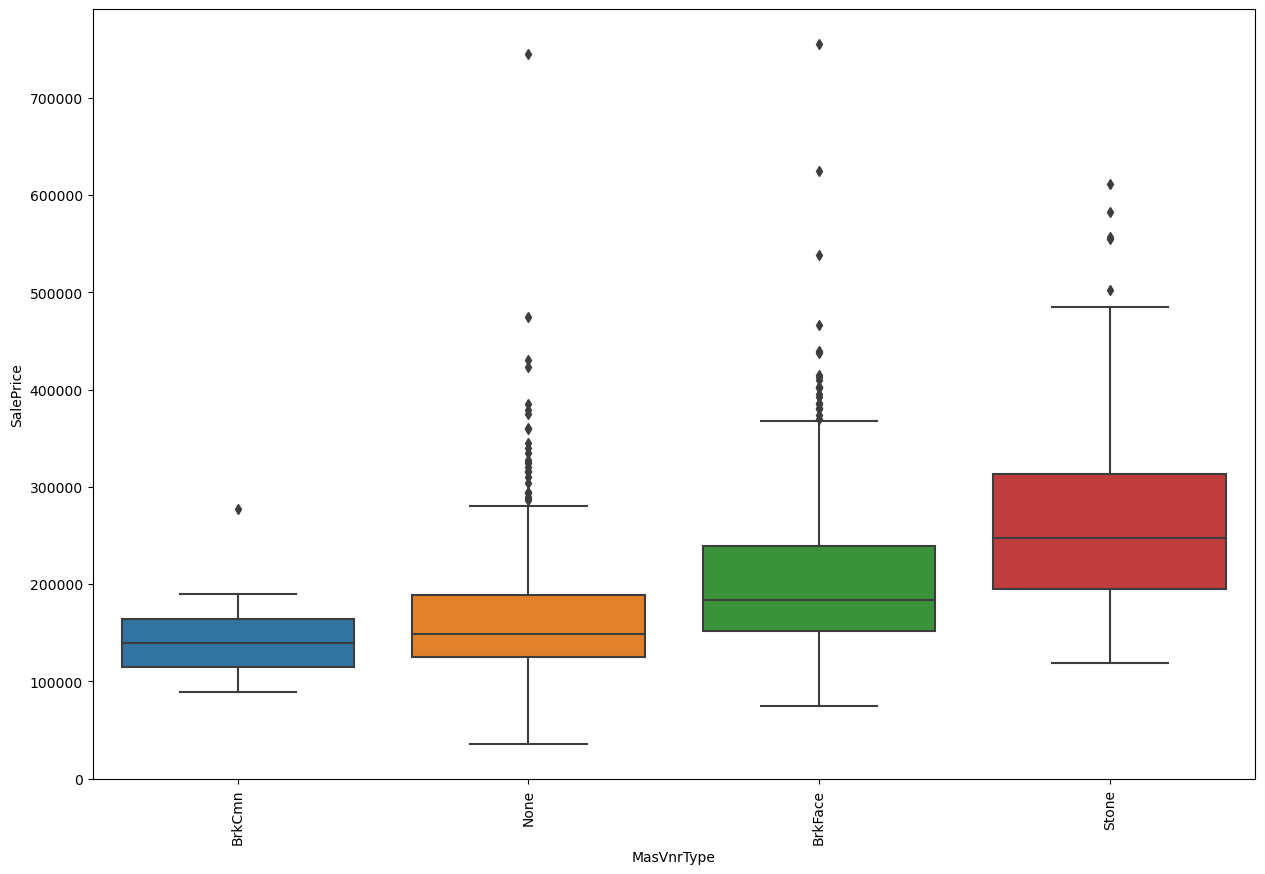

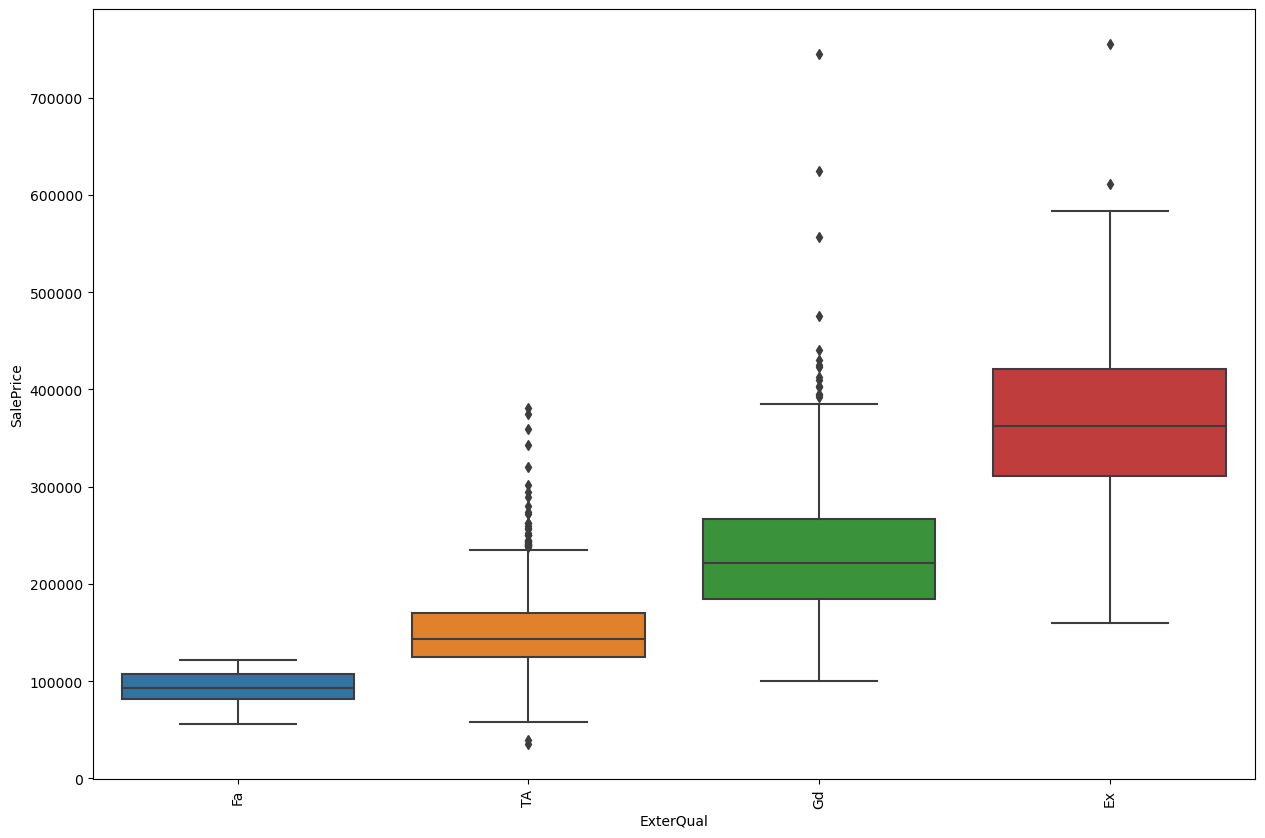

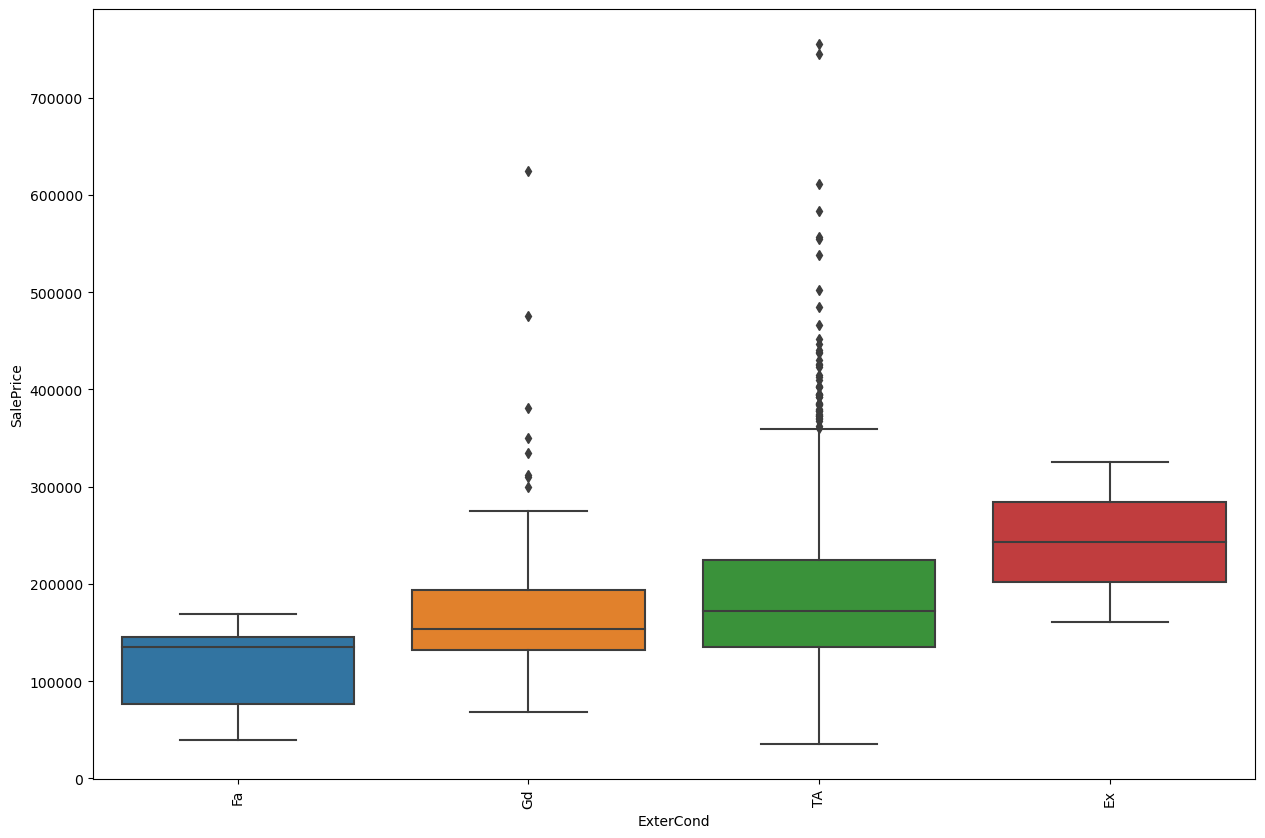

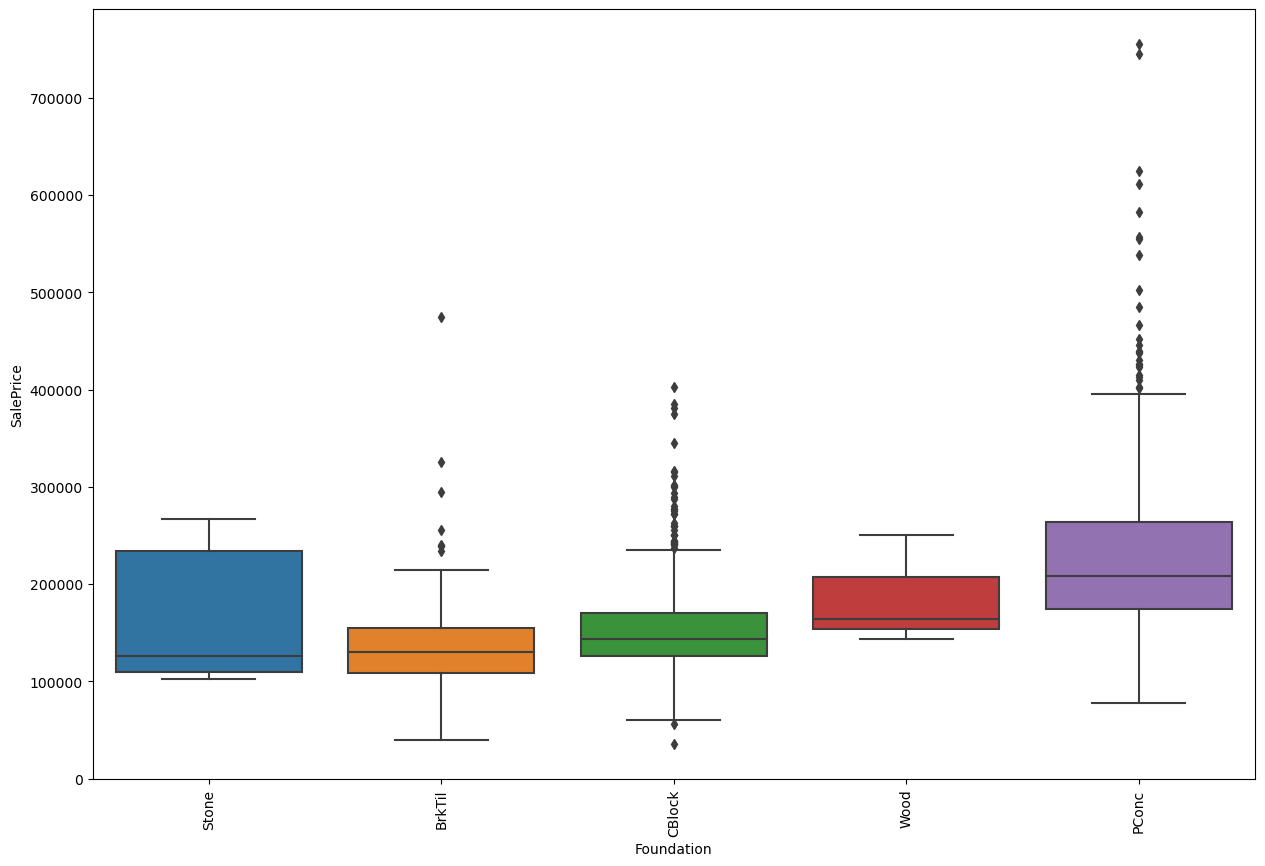

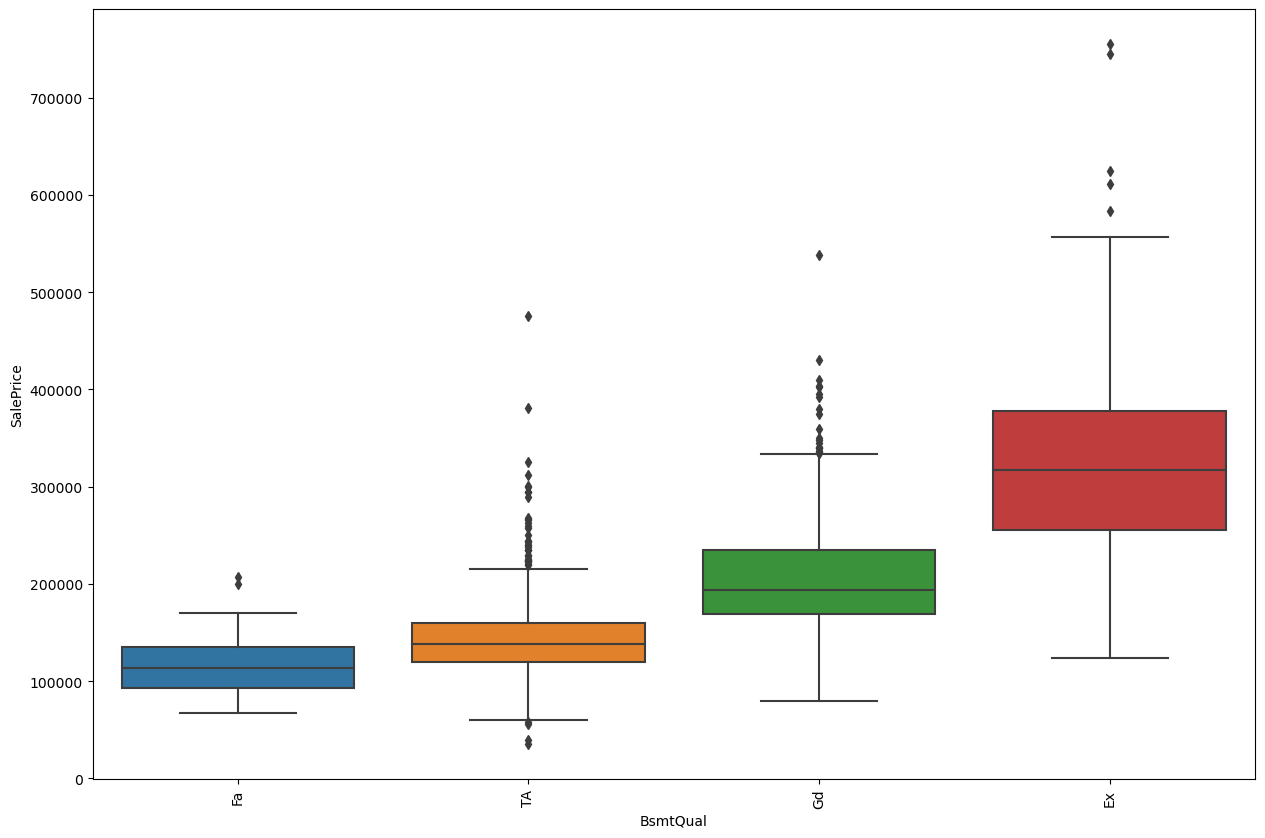

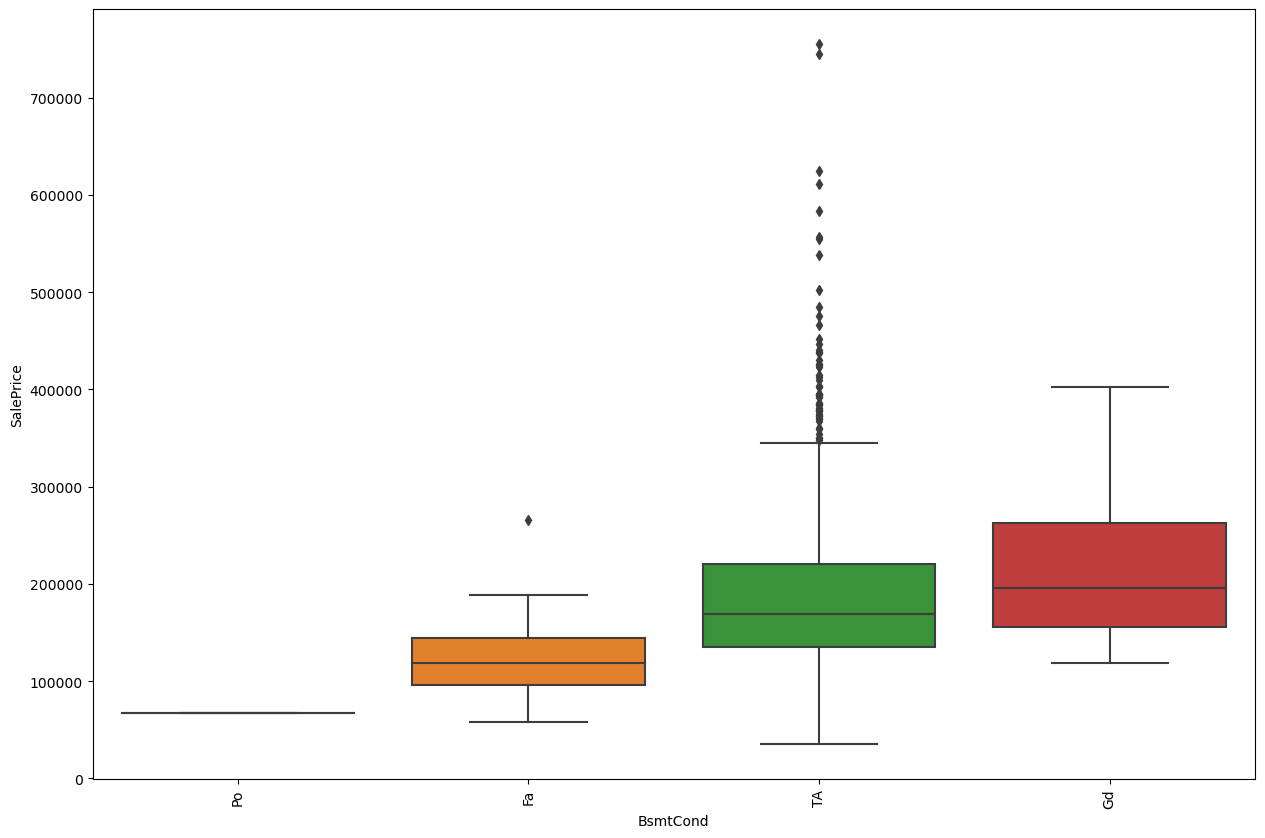

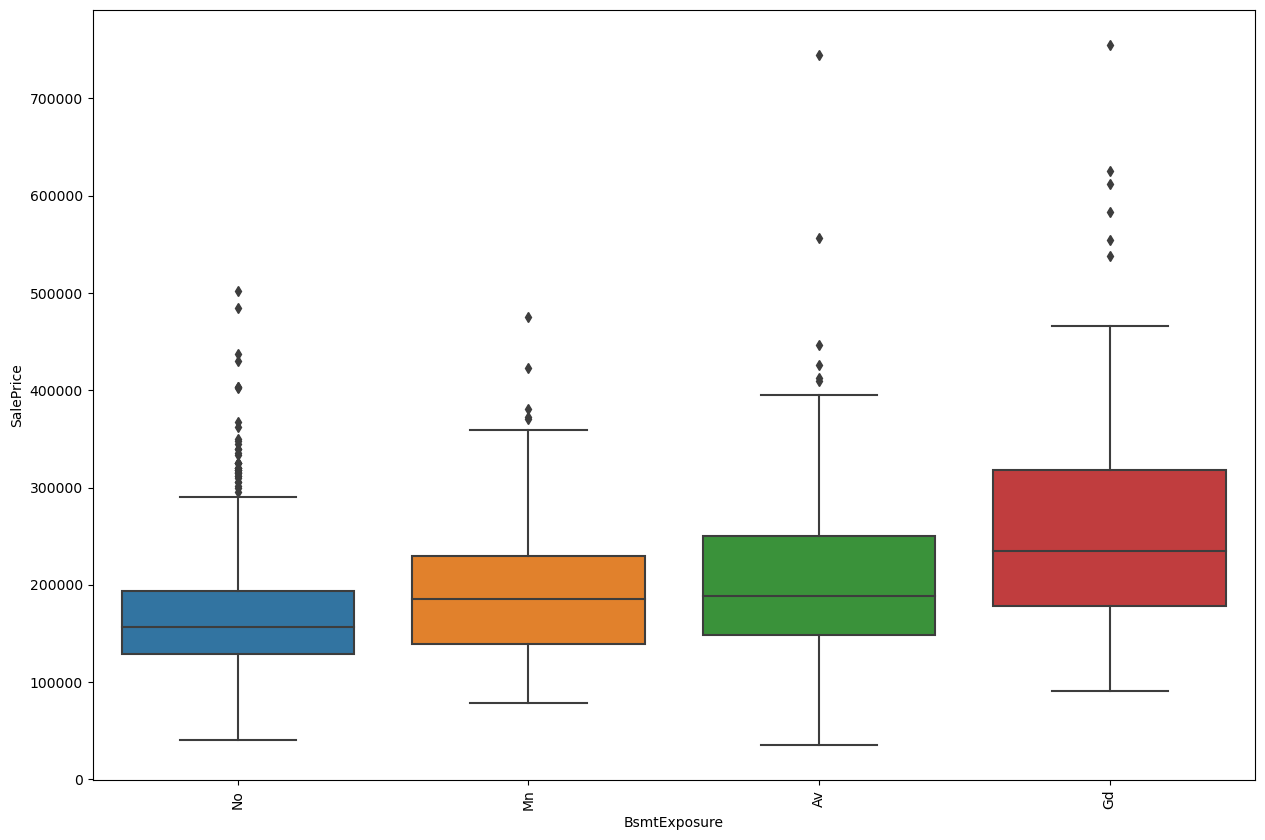

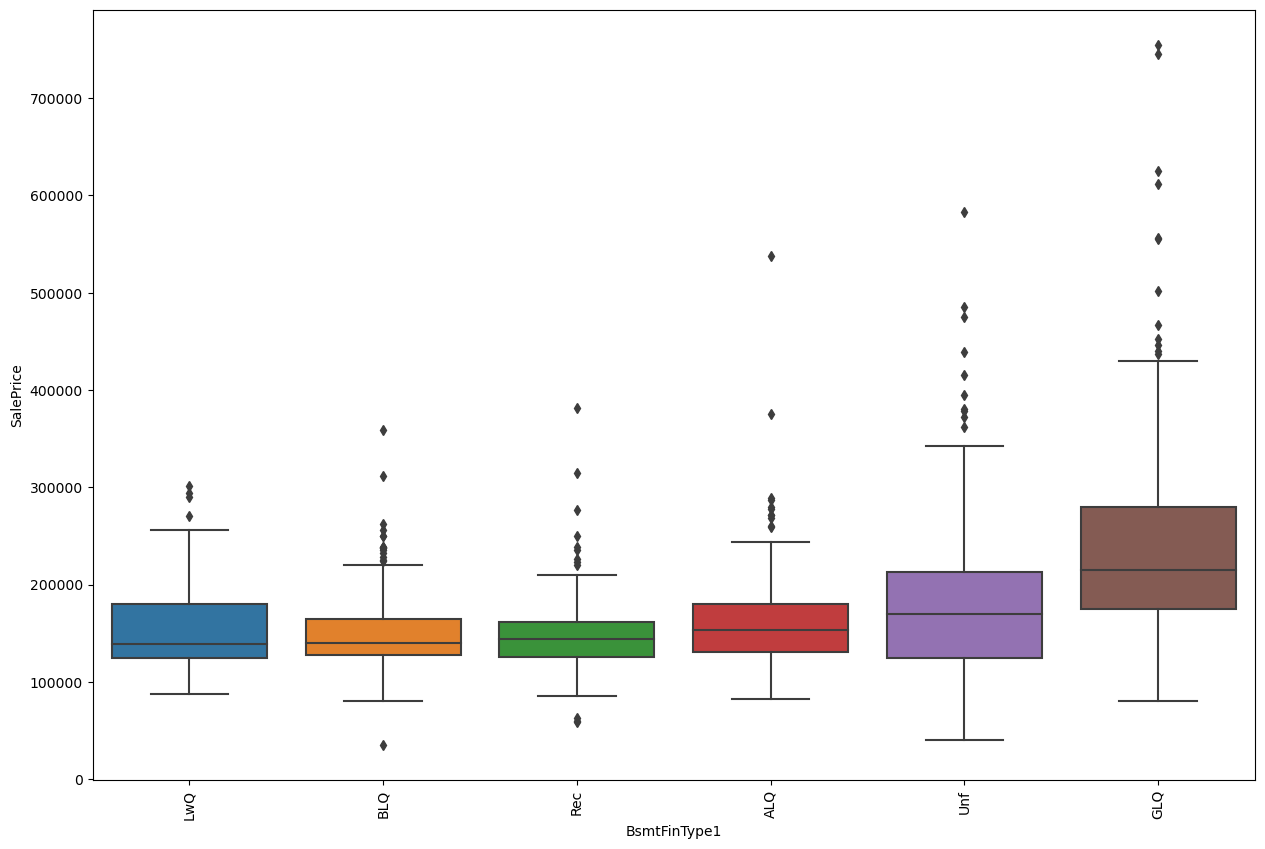

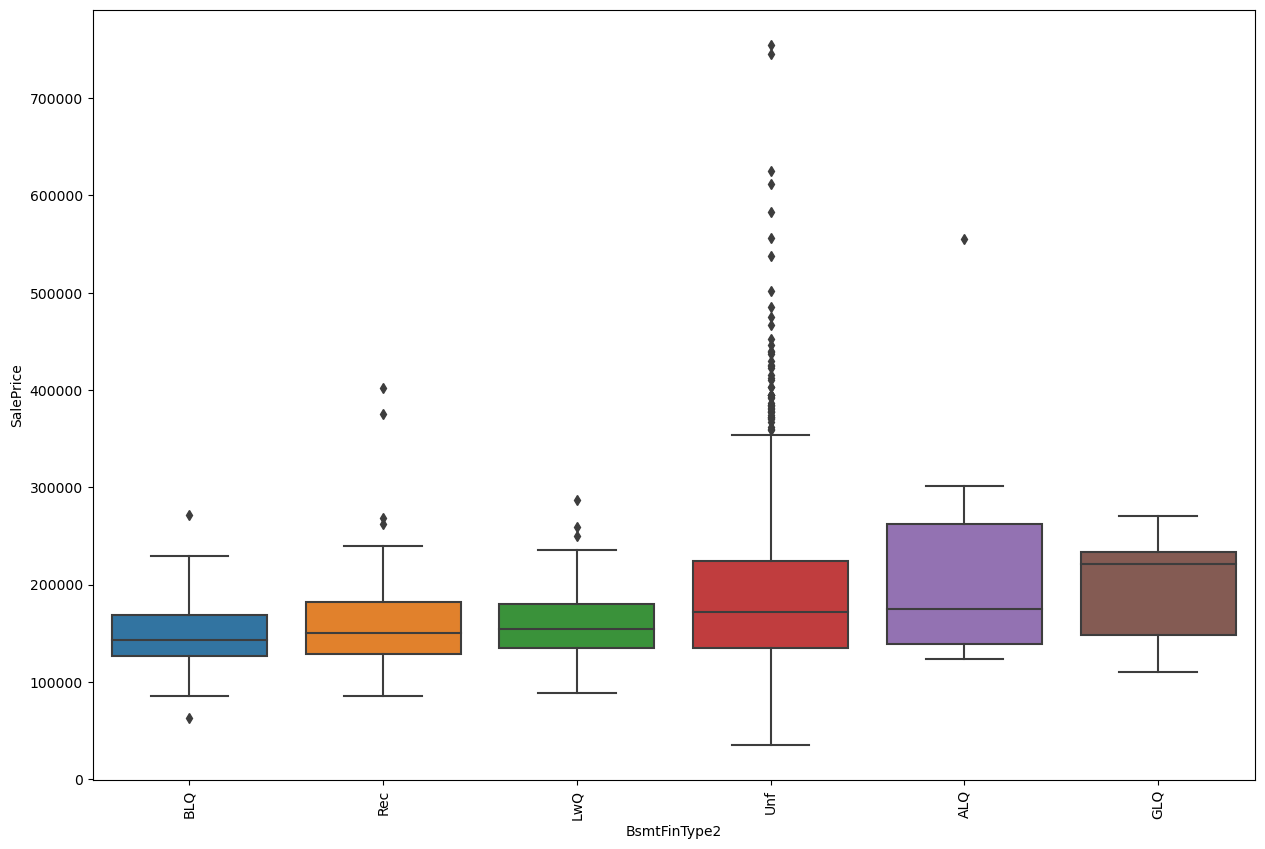

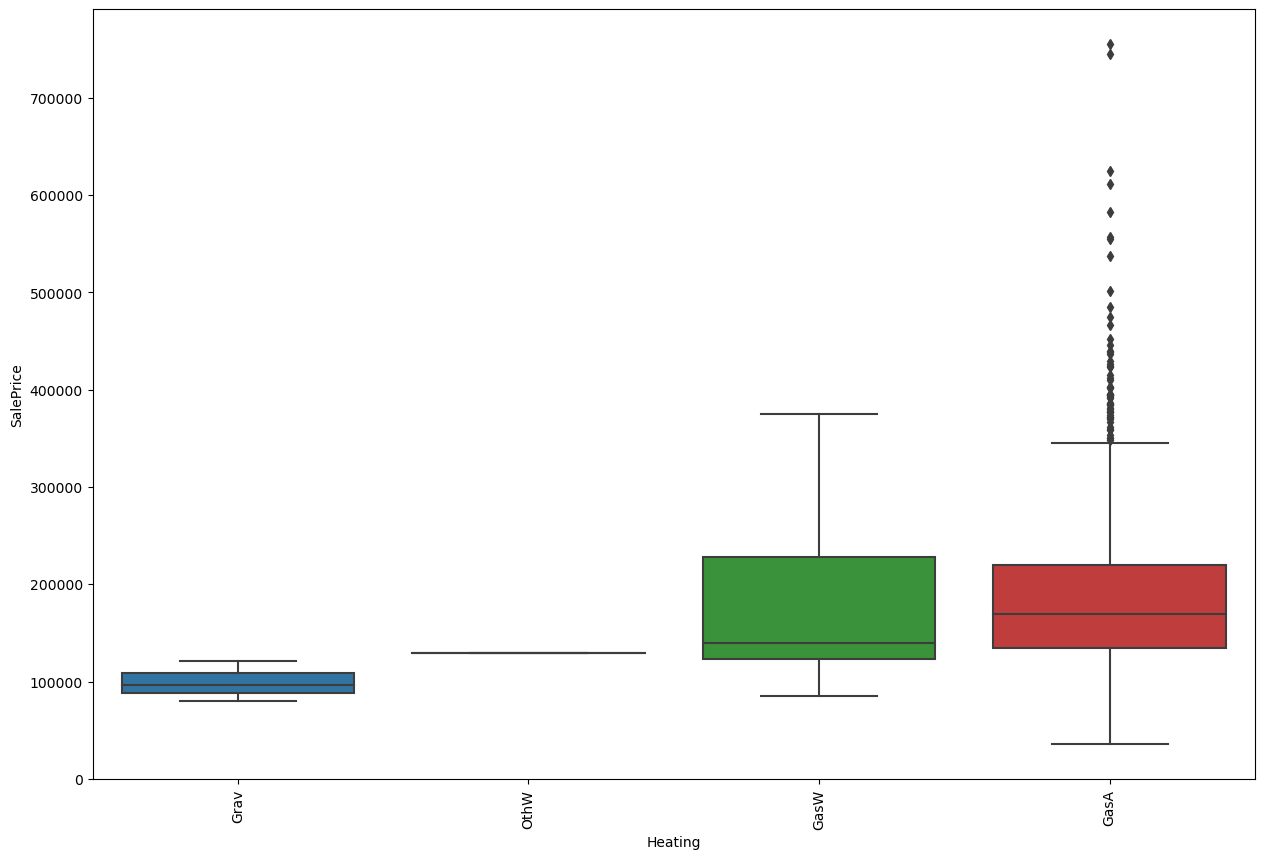

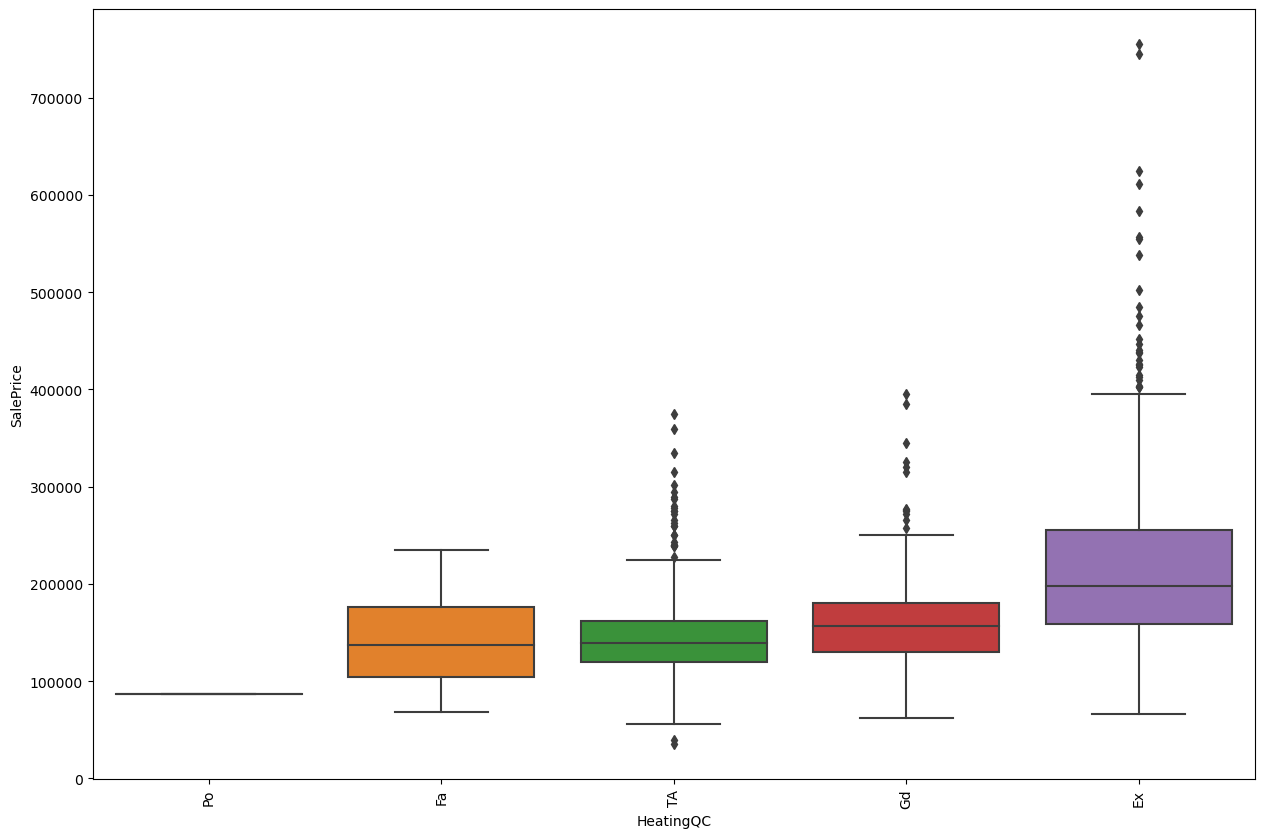

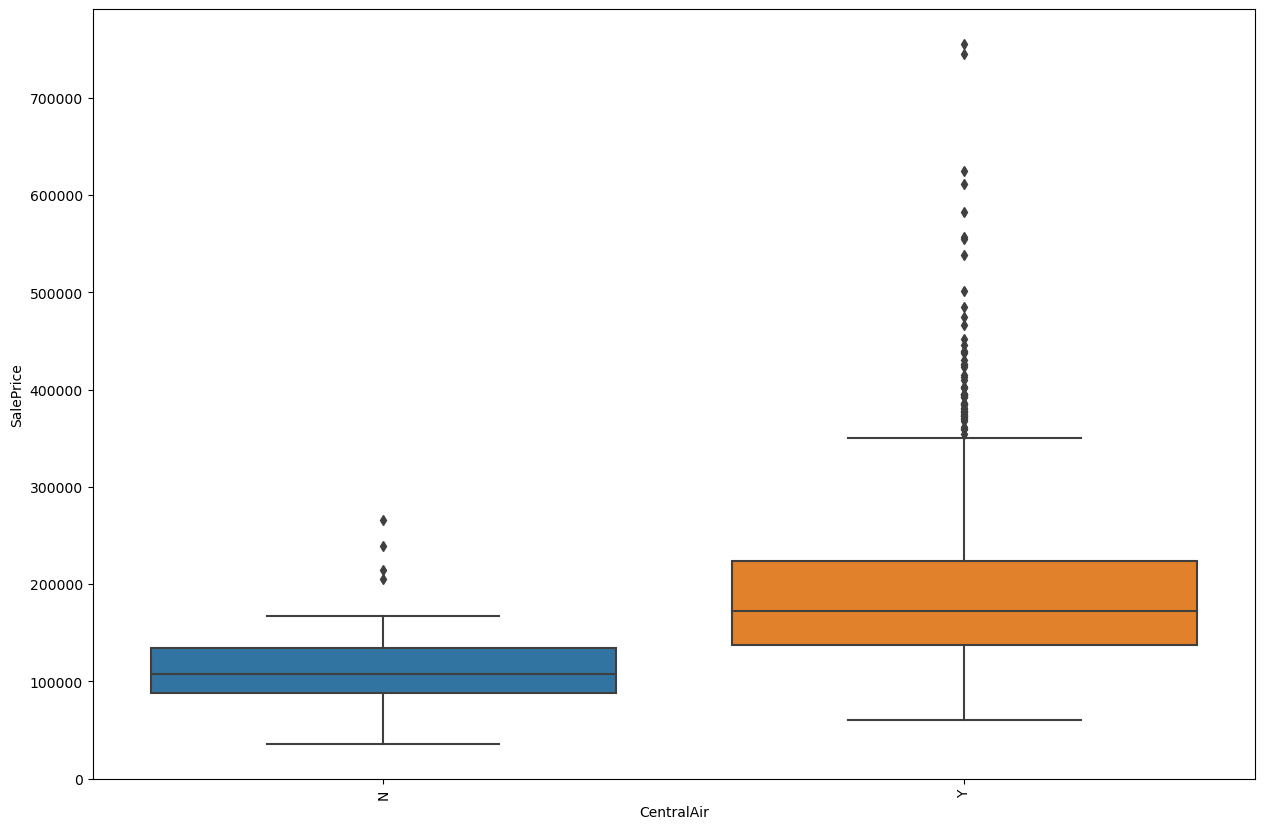

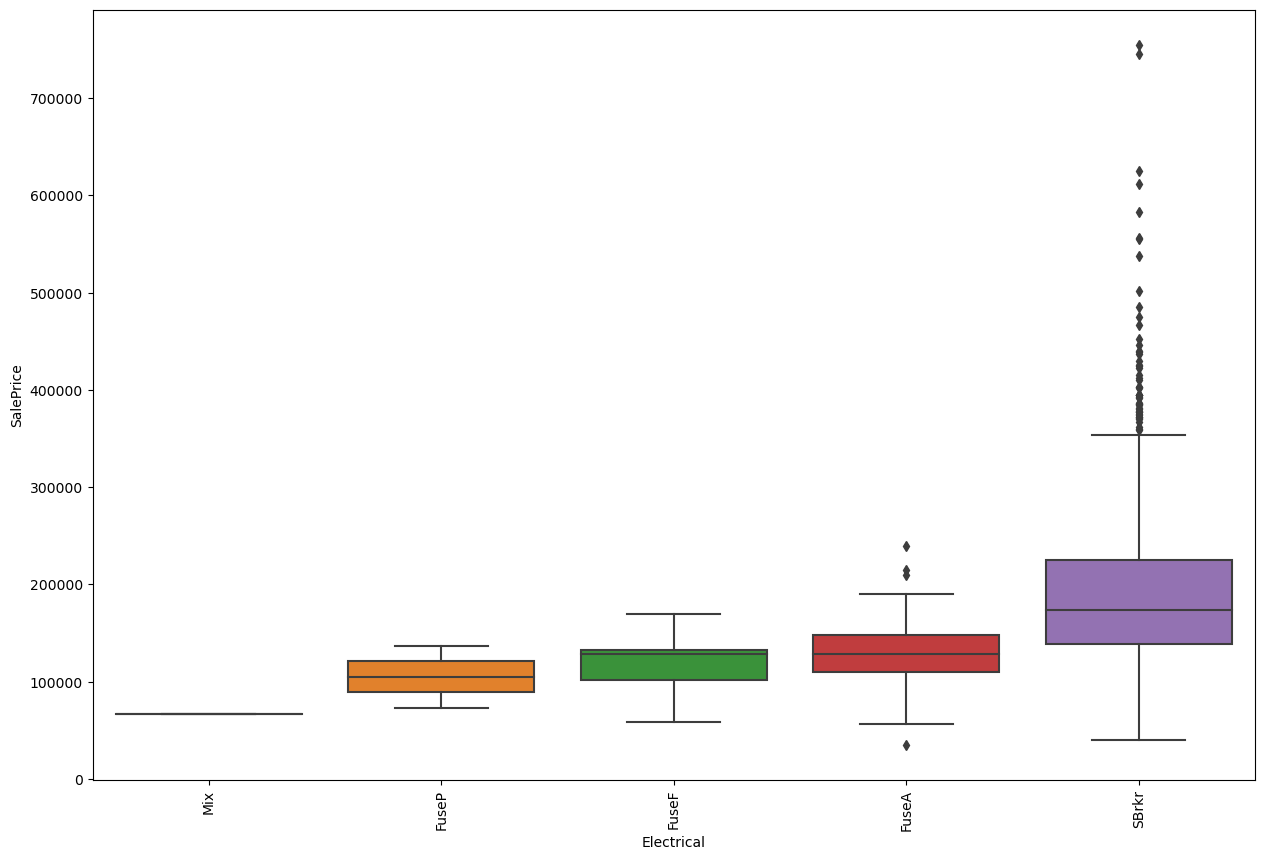

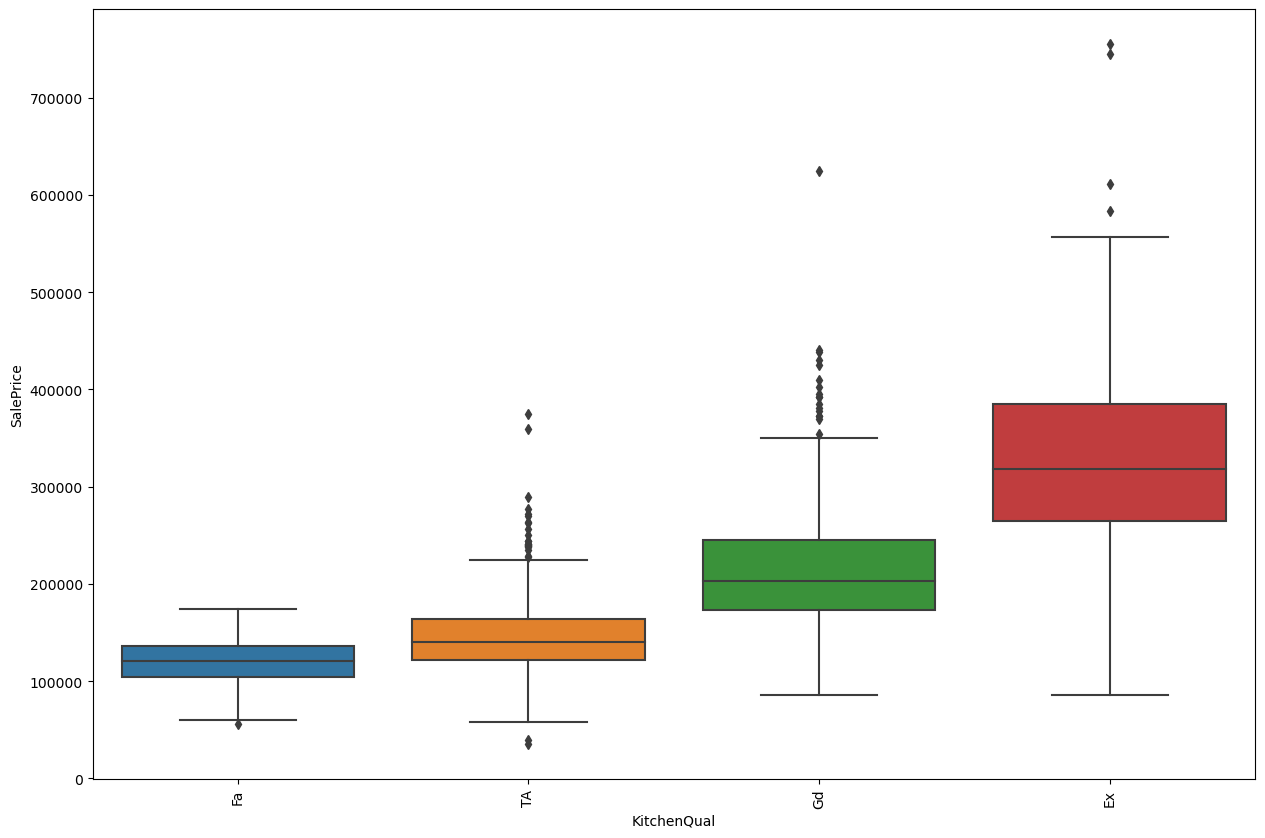

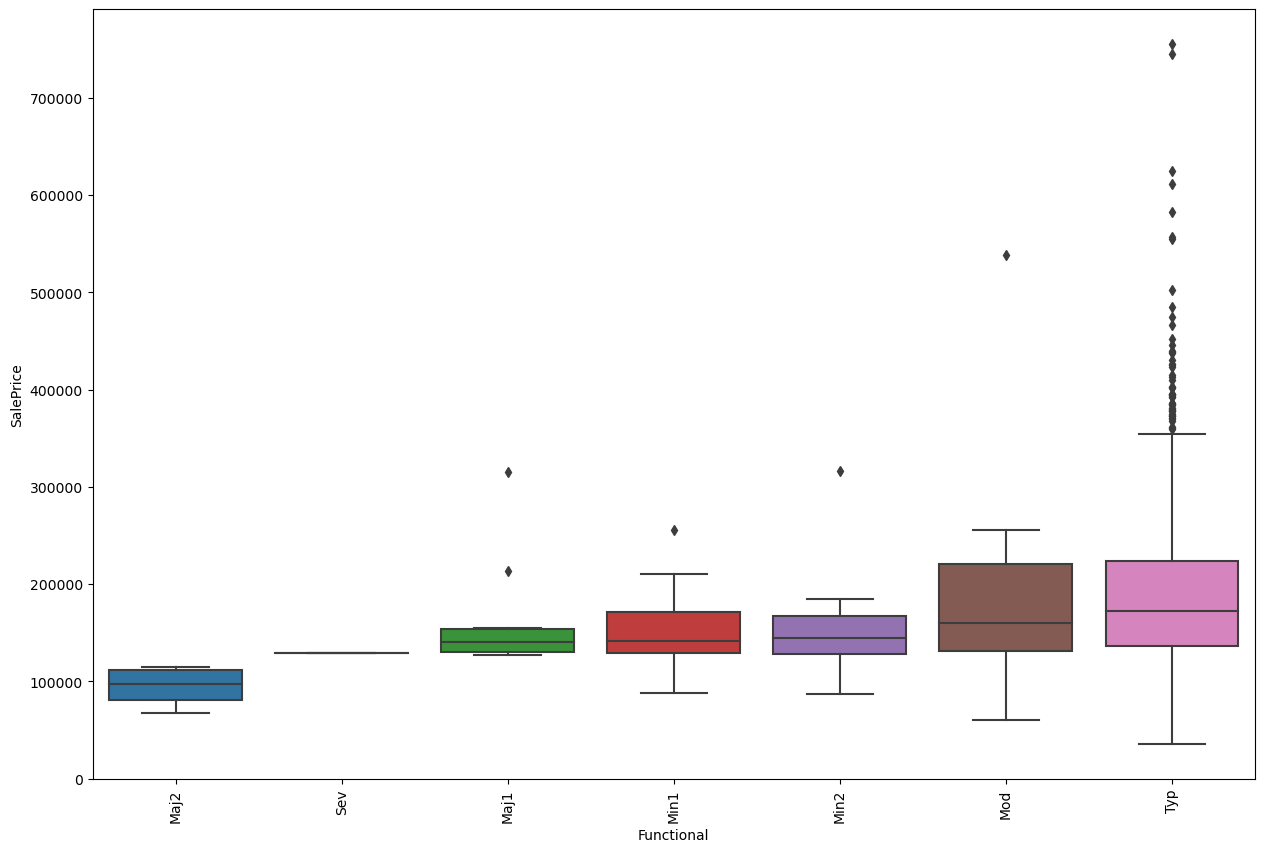

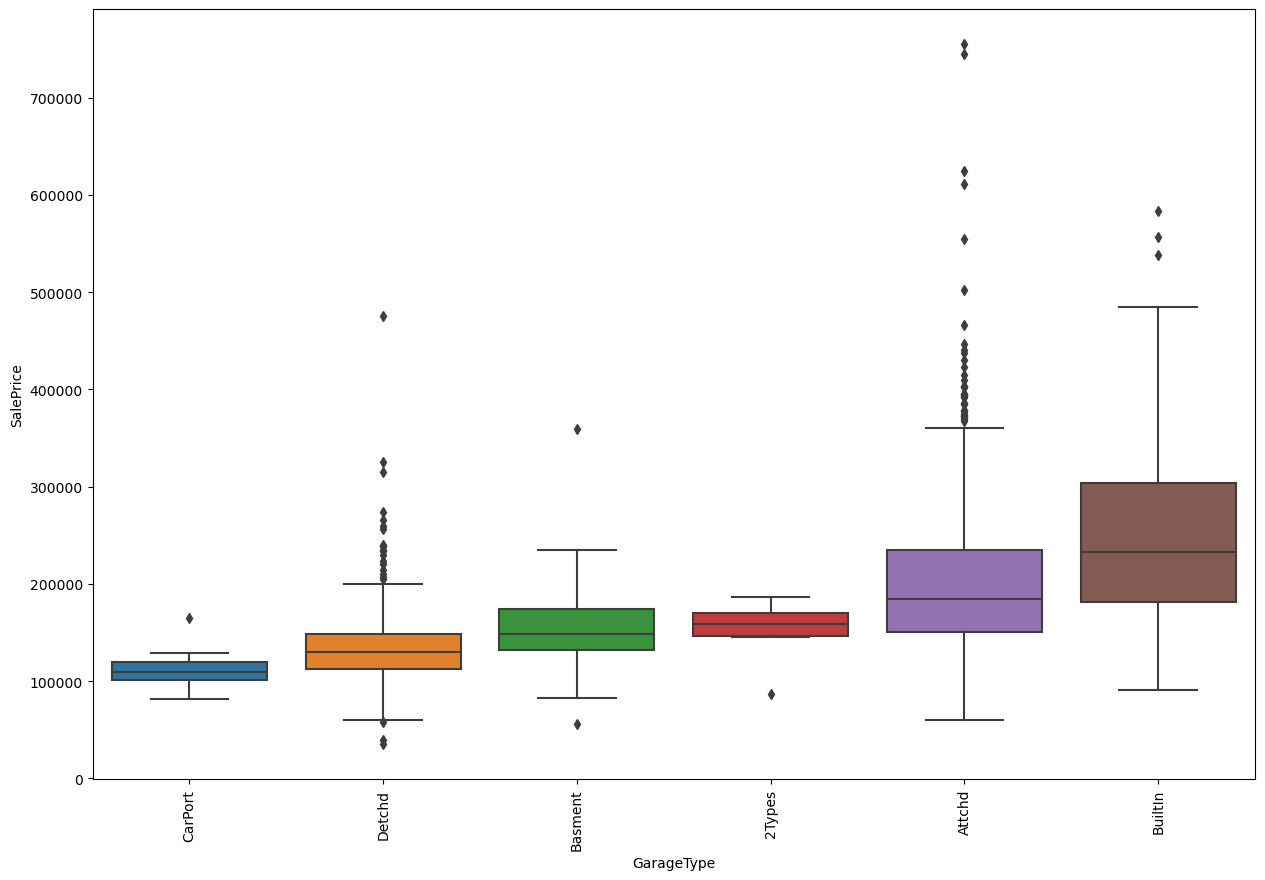

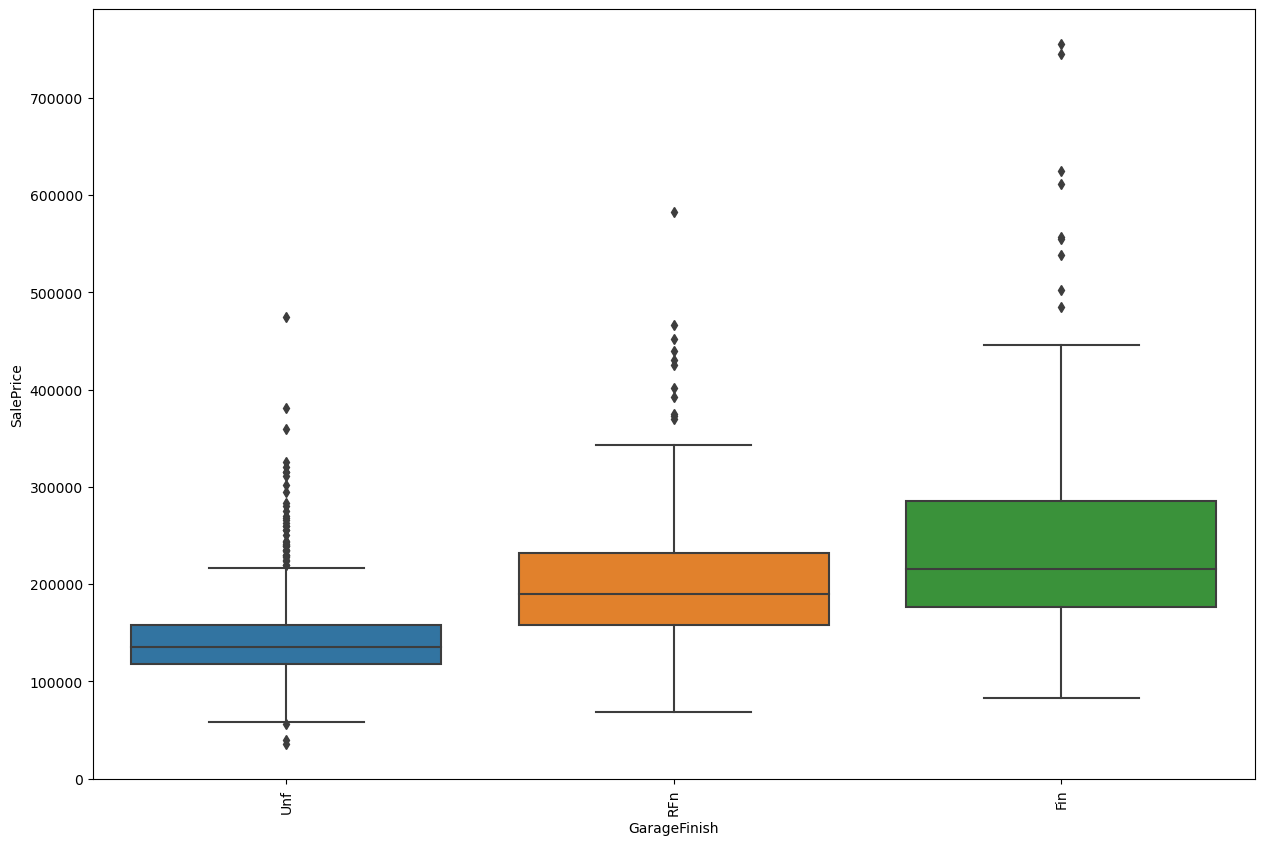

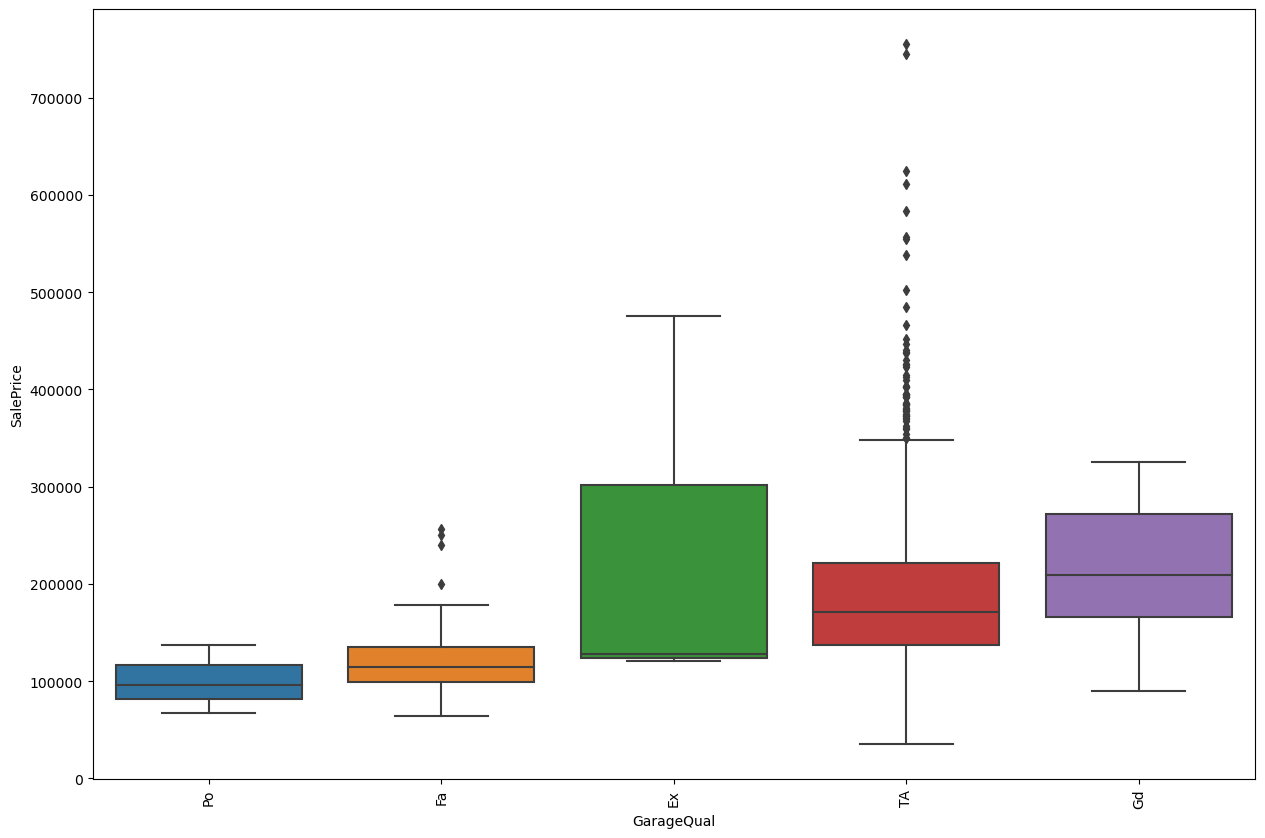

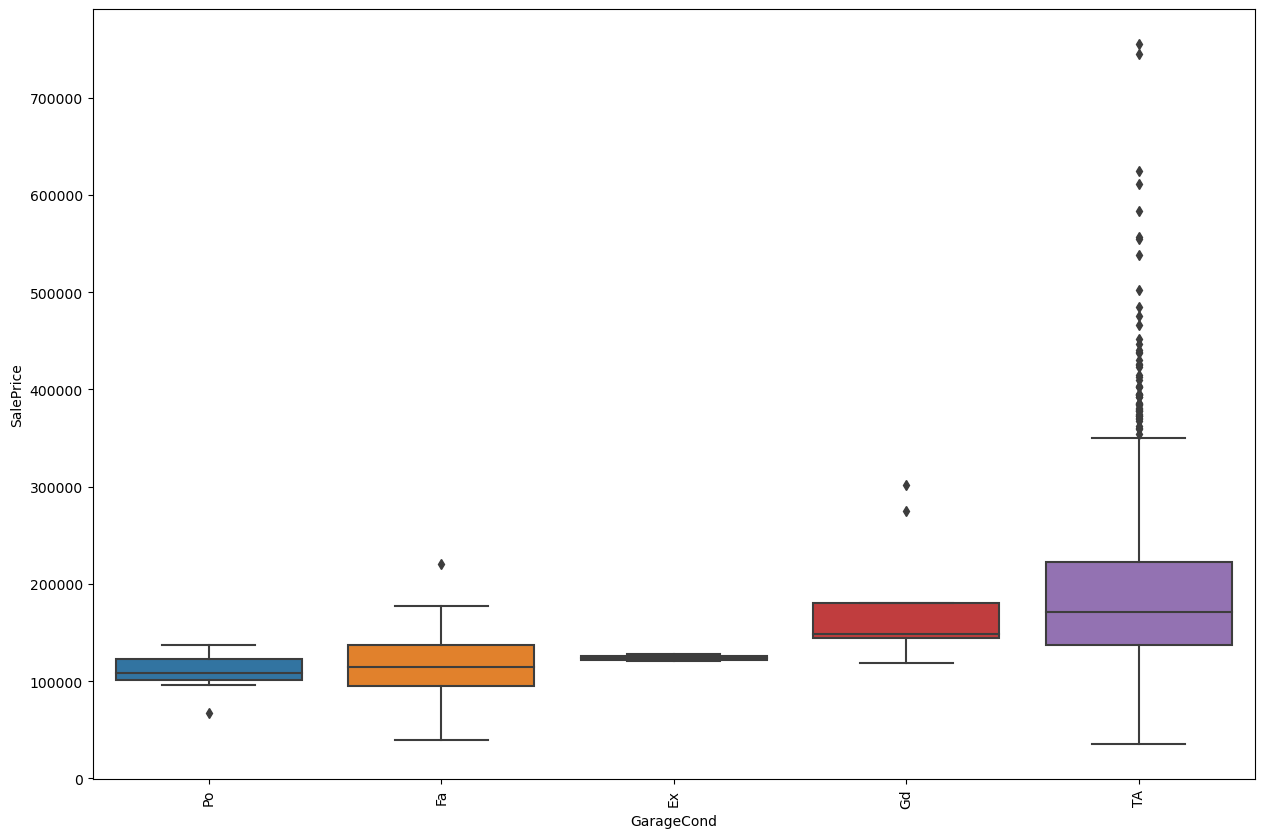

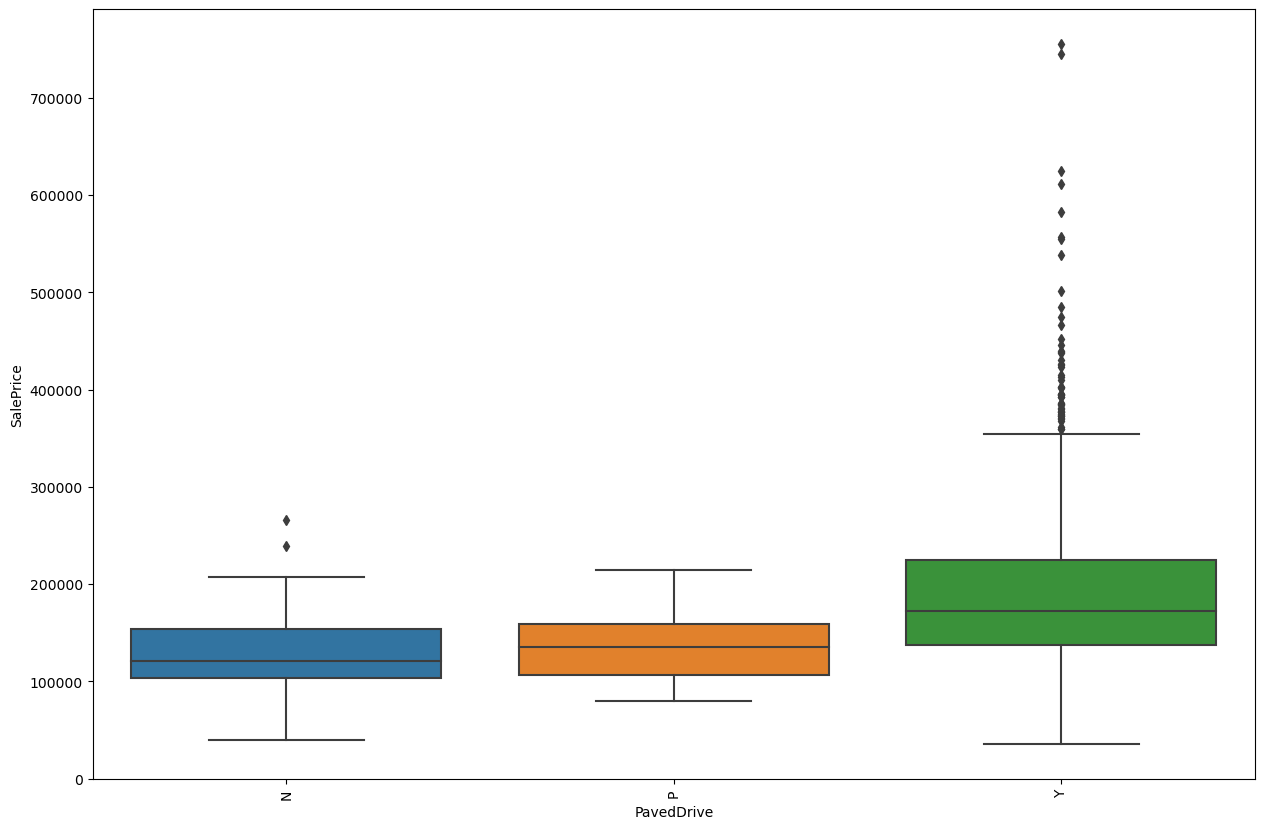

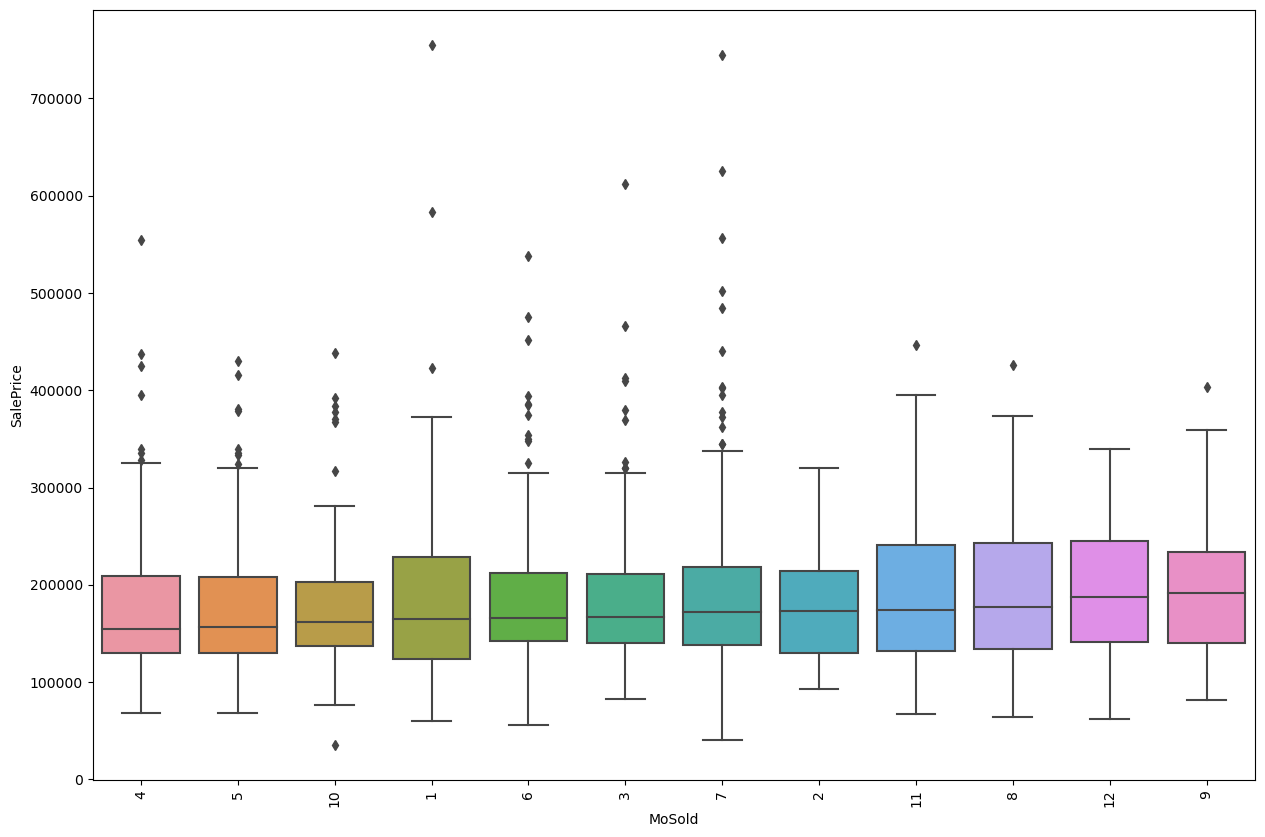

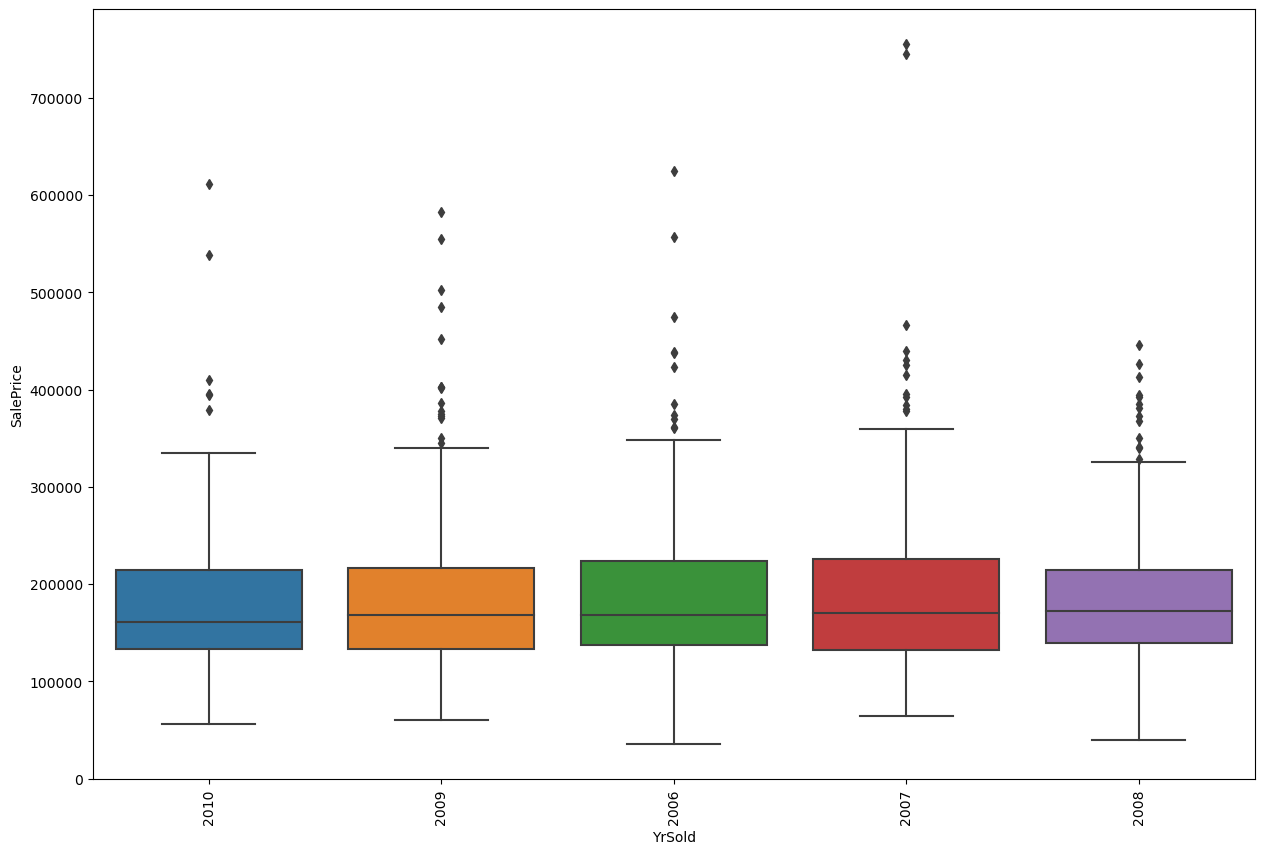

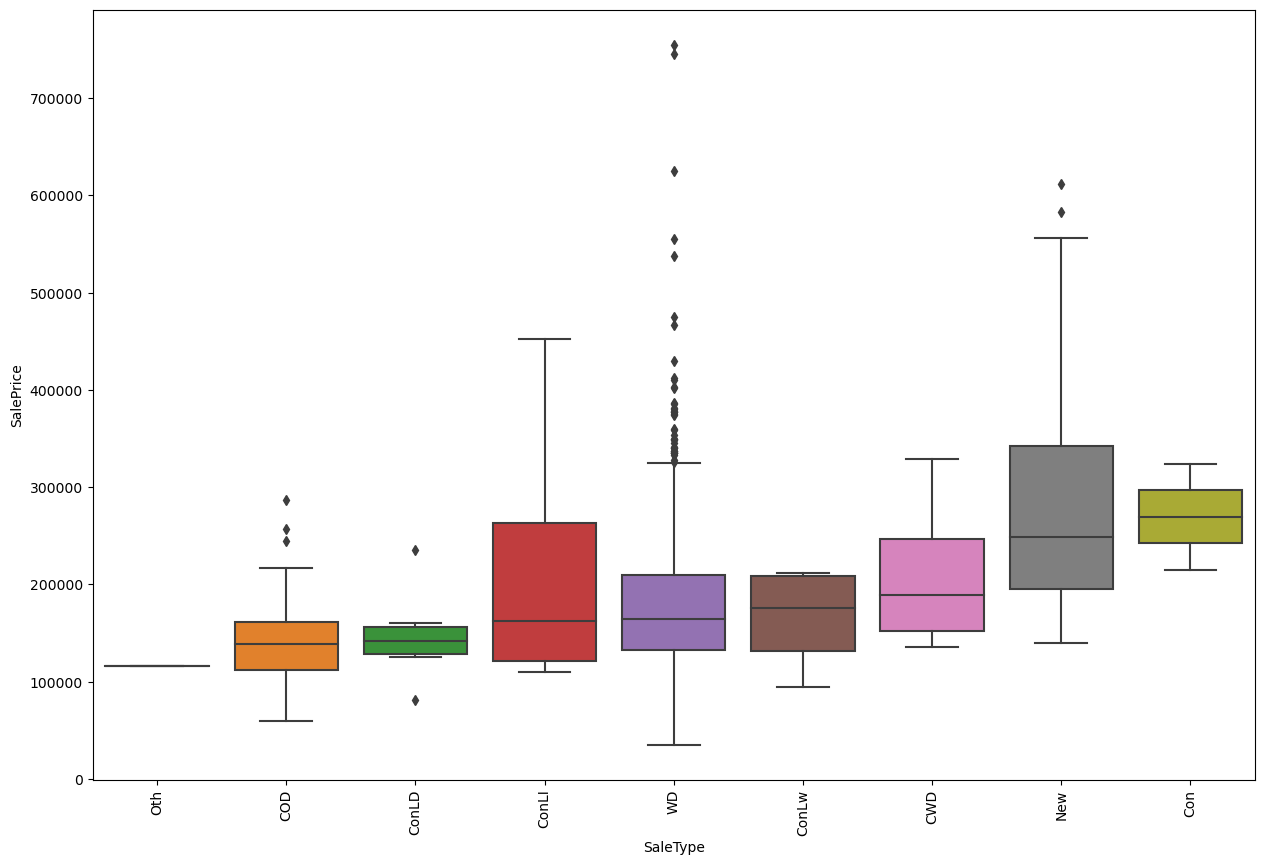

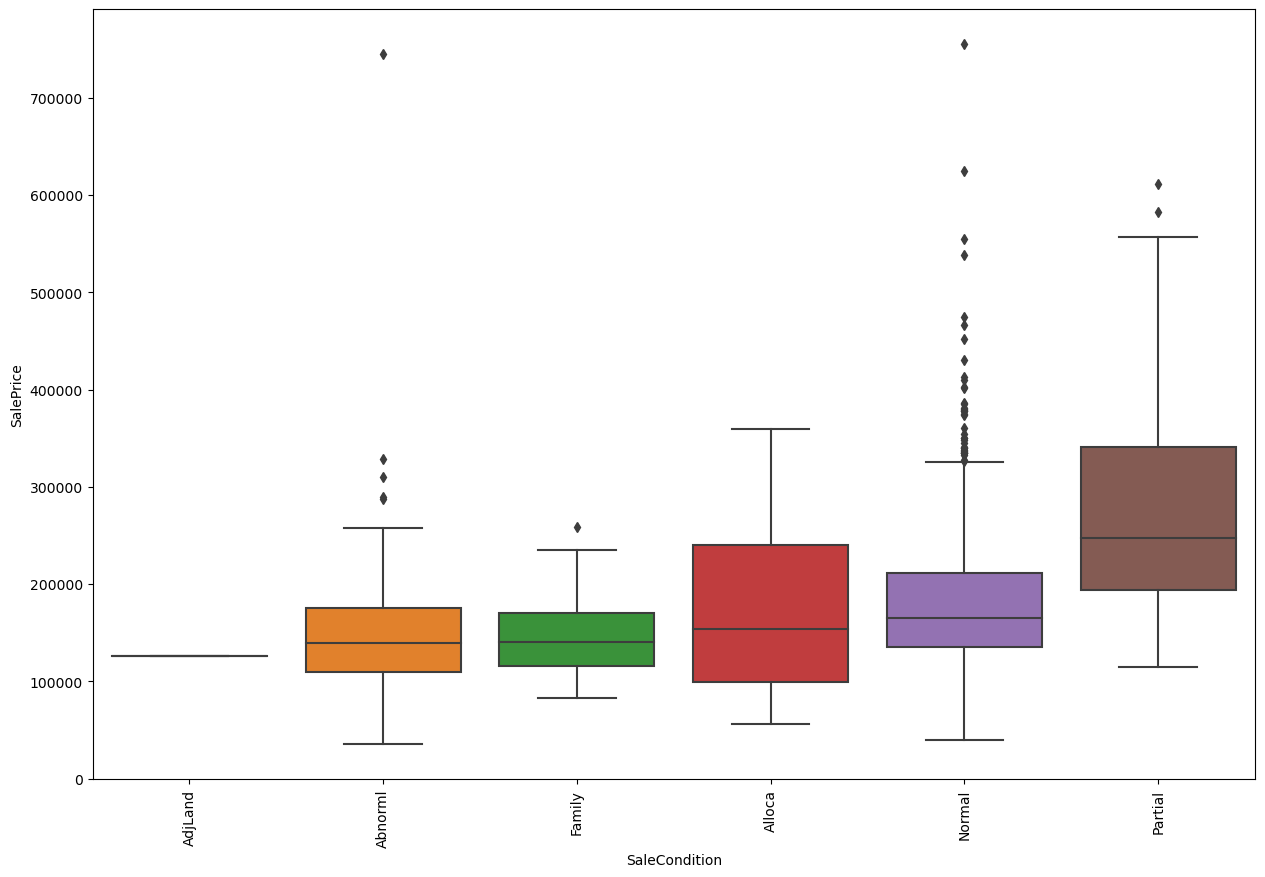

In [23]:
for col in categorical_cols:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x=col, y='SalePrice', data=house, order=house.groupby([col])['SalePrice']
                .median().sort_values().index)
    plt.xticks(rotation=90)
    plt.show()

In [24]:
# Checking the correlation between the variables
corr_ = house.corr()
corr_

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass           1.000000 -0.134158     0.051690    -0.098153   0.056456   
LotArea             -0.134158  1.000000     0.090451     0.001415  -0.005022   
OverallQual          0.051690  0.090451     1.000000    -0.163080   0.570668   
OverallCond         -0.098153  0.001415    -0.163080     1.000000  -0.417330   
YearBuilt            0.056456 -0.005022     0.570668    -0.417330   1.000000   
YearRemodAdd         0.038513  0.001681     0.549460     0.035076   0.617156   
MasVnrArea           0.031333  0.096727     0.401175    -0.141080   0.299410   
BsmtFinSF1          -0.069053  0.210148     0.197441    -0.060068   0.224264   
BsmtFinSF2          -0.079329  0.110493    -0.086014     0.035698  -0.070403   
BsmtUnfSF           -0.141025 -0.014589     0.292940    -0.161038   0.147762   
TotalBsmtSF         -0.263613  0.267188     0.505897    -0.228020   0.385146   
1stFlrSF            -0.258787  0.288502     0.481978    -0.144066   0.263585   
2ndFlrSF             0.306709  0.047773     0.281145     0.011685   0.006989   
LowQualFinSF         0.019990  0.009729    -0.016704     0.041865  -0.160289   
GrLivArea            0.068782  0.255445     0.594470    -0.093843   0.189146   
BsmtFullBath        -0.011317  0.160687     0.083254    -0.070089   0.175108   
BsmtHalfBath        -0.000151  0.046420    -0.064952     0.119671  -0.055204   
FullBath             0.117720  0.115727     0.580425    -0.211882   0.486777   
HalfBath             0.197520  0.006052     0.249283    -0.073568   0.227626   
BedroomAbvGr        -0.065699  0.120369     0.081994     0.023180  -0.080644   
KitchenAbvGr         0.239177 -0.012611    -0.135084    -0.070910  -0.176124   
TotRmsAbvGrd         0.014514  0.185654     0.442941    -0.063883   0.099415   
Fireplaces          -0.024752  0.263061     0.377359    -0.031910   0.110807   
GarageYrBlt          0.082040 -0.025700     0.545835    -0.336541   0.825172   
GarageCars           0.006872  0.138228     0.591878    -0.249832   0.524076   
GarageArea          -0.070278  0.168630     0.530092    -0.204905   0.443854   
WoodDeckSF          -0.010175  0.167822     0.218570    -0.012947   0.212296   
OpenPorchSF         -0.000359  0.084942     0.307615    -0.060429   0.216793   
EnclosedPorch       -0.022598 -0.017968    -0.116931     0.071473  -0.385415   
3SsnPorch           -0.041391  0.019326     0.026470     0.023789   0.028982   
ScreenPorch         -0.022748  0.038489     0.045257     0.053759  -0.070809   
PoolArea             0.010199  0.077050     0.064570    -0.003544   0.001006   
MiscVal             -0.021512  0.040824    -0.029351     0.077314  -0.033493   
MoSold              -0.016283  0.000118     0.062641    -0.011772   0.004396   
YrSold              -0.021591 -0.012066    -0.013949     0.056340  -0.007898   
SalePrice           -0.079599  0.254757     0.783546    -0.108627   0.504297   
YearBuilt_Diff      -0.056456  0.005022    -0.570668     0.417330  -1.000000   
YearRemodAdd_Diff   -0.038513 -0.001681    -0.549460    -0.035076  -0.617156   
GarageYrBlt_Diff    -0.082040  0.025700    -0.545835     0.336541  -0.825172   

                   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass             0.038513    0.031333   -0.069053   -0.079329   
LotArea                0.001681    0.096727    0.210148    0.110493   
OverallQual            0.549460    0.401175    0.197441   -0.086014   
OverallCond            0.035076   -0.141080   -0.060068    0.035698   
YearBuilt              0.617156    0.299410    0.224264   -0.070403   
YearRemodAdd           1.000000    0.168311    0.099681   -0.085268   
MasVnrArea             0.168311    1.000000    0.253015   -0.083303   
BsmtFinSF1             0.099681    0.253015    1.000000   -0.064855   
BsmtFinSF2            -0.085268   -0.083303   -0.064855    1.000000   
BsmtUnfSF              0.171881    0.104662   -0.552809   -0.233449   
TotalBsmtSF            0.264281    0.

**Price correlation with independent variables:**

> Overall material quality and finish, ground living space, garage size (i.t.o Car capacity), garage area(in sq. ft.), total basement area(in sq. ft.), first floor area(sq. ft.), number of bathrooms, total rooms, and year built are all highly(positively) connected to price. There are also certain qualities that people consider while acquiring a home.

> The covered porch area (sq feet), kind of residence, overall quality of the house, and a few other criteria all have a negative correlation with price.

**Independent variables have a strong correlation:**

> Some independent factors, such as first-floor and basement size, garage area (in terms of square feet and automobiles), total rooms and living area, and so on, have a strong correlation.

> Some independent factors, such as unfinished and completed basement space, and bsmt full bathrooms, show a negative correlation.

#### Plotting a heatmap to visualize the correlation

<Axes: >

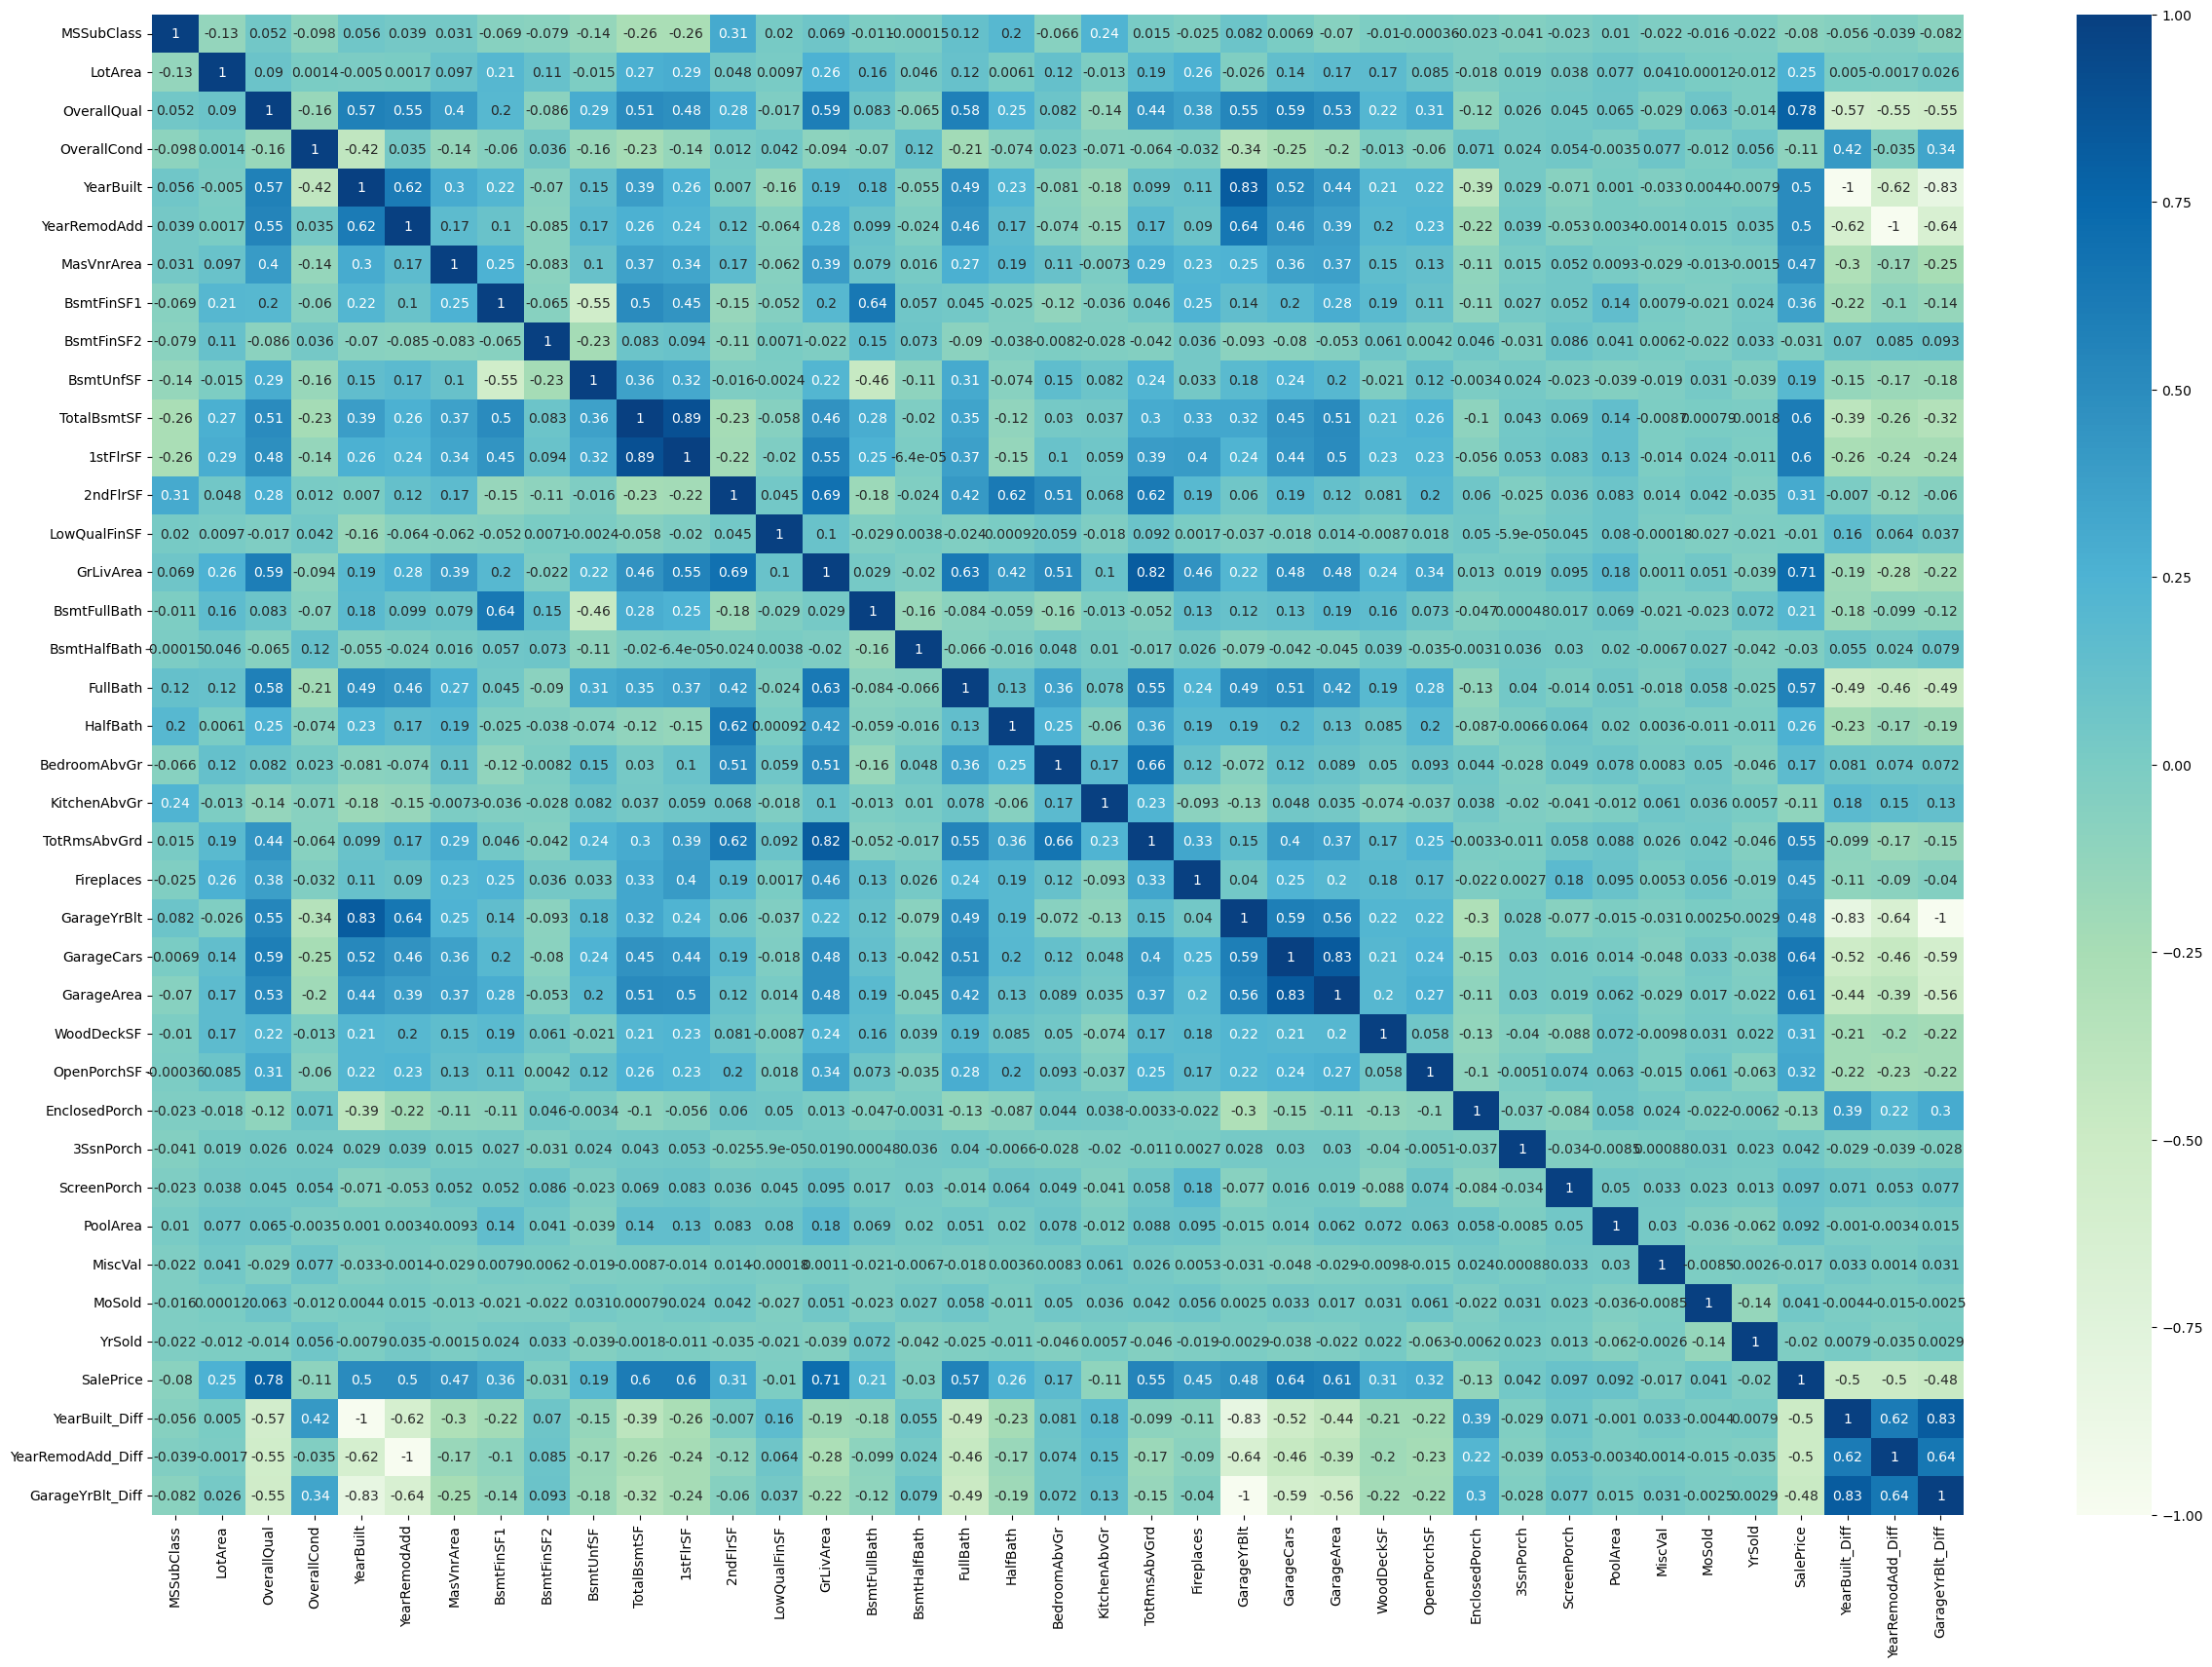

In [25]:
plt.figure(figsize=(30,20))
house_corr = house.corr()
sns.heatmap(house_corr, cmap="GnBu", annot=True)

From the above heatmap, we can see that there is correlation in the data

### 6. Creating Dummy Variables

In [26]:
house[categorical_cols] = house[categorical_cols].astype('object')
dummy = pd.get_dummies(house[categorical_cols], drop_first=True)
dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 235 columns]

In [27]:
house.drop(categorical_cols, axis=1, inplace=True)
house = pd.concat([house, dummy], axis=1)
house.shape

(1338, 269)

####  7.Data preparation and Modelling/

> Outlier handling

In [28]:

def drop_outliers(df=house):
    """
        Drop records with outliers present
        Lower quantile is .25, Upper quantile is .99
    """
    for column in numerical_cols:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [29]:
house = drop_outliers(house)
house.shape

(1336, 269)

> Splitting into Test and Train set

In [30]:

y = house.pop('SalePrice')
X = house

In [31]:

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

> Running the standard scaler

In [32]:
# Generating a 70:30 split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

#### Model Building
***Building a Simple Linear Regression model***
****


In [33]:
# linear regression model with all the variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predicting on the train set
y_train_pred = lr.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred)

0.952111488912538

In [35]:
# Predicting on the test set
y_test_pred = lr.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred)

0.831123021782683

In [36]:
# Checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

-1159759.7146886208


[(0.7110329891626964, 'LotArea'),
 (207.16420283549908, 'YearBuilt'),
 (49.04569213789836, 'YearRemodAdd'),
 (11.16160974646931, 'MasVnrArea'),
 (15.44056526275915, 'BsmtFinSF1'),
 (7.599530171864785, 'BsmtFinSF2'),
 (0.3196510609092229, 'BsmtUnfSF'),
 (23.359760783689865, 'TotalBsmtSF'),
 (11.108504876698134, '1stFlrSF'),
 (23.79661344604338, '2ndFlrSF'),
 (11.253126150611763, 'LowQualFinSF'),
 (46.15827525896816, 'GrLivArea'),
 (-265.0598926422071, 'BsmtFullBath'),
 (3933.116464707036, 'BsmtHalfBath'),
 (2002.778352670947, 'FullBath'),
 (1655.5948276780891, 'HalfBath'),
 (-3422.108359327639, 'BedroomAbvGr'),
 (-18211.223712044582, 'KitchenAbvGr'),
 (-811.6602368654077, 'TotRmsAbvGrd'),
 (4219.939895725513, 'Fireplaces'),
 (-31.284483918356273, 'GarageYrBlt'),
 (4660.327825906573, 'GarageCars'),
 (7.563370718144768, 'GarageArea'),
 (15.21343889740939, 'WoodDeckSF'),
 (14.674567742386785, 'OpenPorchSF'),
 (16.272938728449617, 'EnclosedPorch'),
 (22.277172206455248, '3SsnPorch'),
 (43.1

***Building the model using Ridge Regression***

In [37]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.017777      0.003526         0.001602        0.003205      0.0001   
1        0.010890      0.006429         0.009434        0.007703       0.001   
2        0.011340      0.006273         0.006169        0.007560        0.01   
3        0.011370      0.009775         0.007488        0.007082        0.05   
4        0.012720      0.006416         0.009273        0.007590         0.1   
5        0.010938      0.004169         0.005143        0.005189         0.2   
6        0.012709      0.002758         0.005318        0.004685         0.3   
7        0.012368      0.004983         0.007587        0.005986         0.4   
8        0.013211      0.004752         0.008511        0.004834         0.5   
9        0.018551      0.004289         0.006571        0.001610         0.6   
10       0.012713      0.006406         0.007972        0.007013         0.7   
11       0.012601      0.003775         0.004542        0.004965         0.8   
12       0.014460      0.002411         0.007676        0.004386         0.9   
13       0.017892      0.009721         0.008695        0.005448         1.0   
14       0.020322      0.008300         0.007111        0.005249         2.0   
15       0.024469      0.005235         0.008135        0.005007         3.0   
16       0.015584      0.001340         0.002229        0.003175         4.0   
17       0.016343      0.000479         0.006580        0.006319         5.0   
18       0.015274      0.001503         0.008724        0.005398         6.0   
19       0.014145      0.002541         0.002707        0.003630         7.0   
20       0.016306      0.001727         0.005034        0.005312         8.0   
21       0.016940      0.001770         0.007682        0.004410         9.0   
22       0.016255      0.006034         0.007478        0.006032        10.0   
23       0.017942      0.001705         0.009104        0.002075          20   
24       0.014072      0.001561         0.009822        0.005220          50   
25       0.012088      0.006063         0.006712        0.007638         100   
26       0.015144      0.000860         0.006257        0.007663         500   
27       0.022047      0.007806         0.005059        0.006184        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -23180.200314      -20184.698421   
1    {'alpha': 0.001}      -22967.692649      -20054.128633   
2     {'alpha': 0.01}      -21553.509436      -19402.284236   
3     {'alpha': 0.05}      -20276.174454      -19090.876758   
4      {'alpha': 0.1}      -19942.271310      -19084.761691   
5      {'alpha': 0.2}      -19487.314870      -19012.889160   
6      {'alpha': 0.3}      -19186.417315      -18864.426315   
7      {'alpha': 0.4}      -18986.155004      -18716.633831   
8      {'alpha': 0.5}      -18820.196188      -18583.648456   
9      {'alpha': 0.6}      -18675.334843      -18467.783708   
10     {'alpha': 0.7}      -18553.824625      -18366.218996   
11     {'alpha': 0.8}      -18459.827953      -18269.002887   
12     {'alpha': 0.9}      -18391.942010      -18177.277861   
13     {'alpha': 1.0}      -18331.307763      -18091.492631   
14     {'alpha': 2.0}      -17931.859196      -17548.640646   
15     {'alpha': 3.0}      -17743.171151      -17167.123079   
16     {'alpha': 4.0}      -17686.539899      -16838.435353   
17     {'alpha': 5.0}      -17675.722205      -16627.278867   
18     {'alpha': 6.0}      -17686.459119      -16466.980611   
19     {'alpha': 7.0}      -17714.717180      -16321.846109   
20     {'alpha': 8.0}      -17749.810093      -16185.505708   
21     {'alpha': 9.0}      -17786.679309      -16068.882024   
22    {'alpha': 10.0}      -17825.474493      -15962.450595   
23      {'alpha': 20}      -18502.383850      -15701.491938   
24      {'alpha': 50}      -19979.859998      -16828.371081   
25     {'alpha': 100}      -21136.100721     

In [39]:
model_cv.best_params_

{'alpha': 10.0}

In [40]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

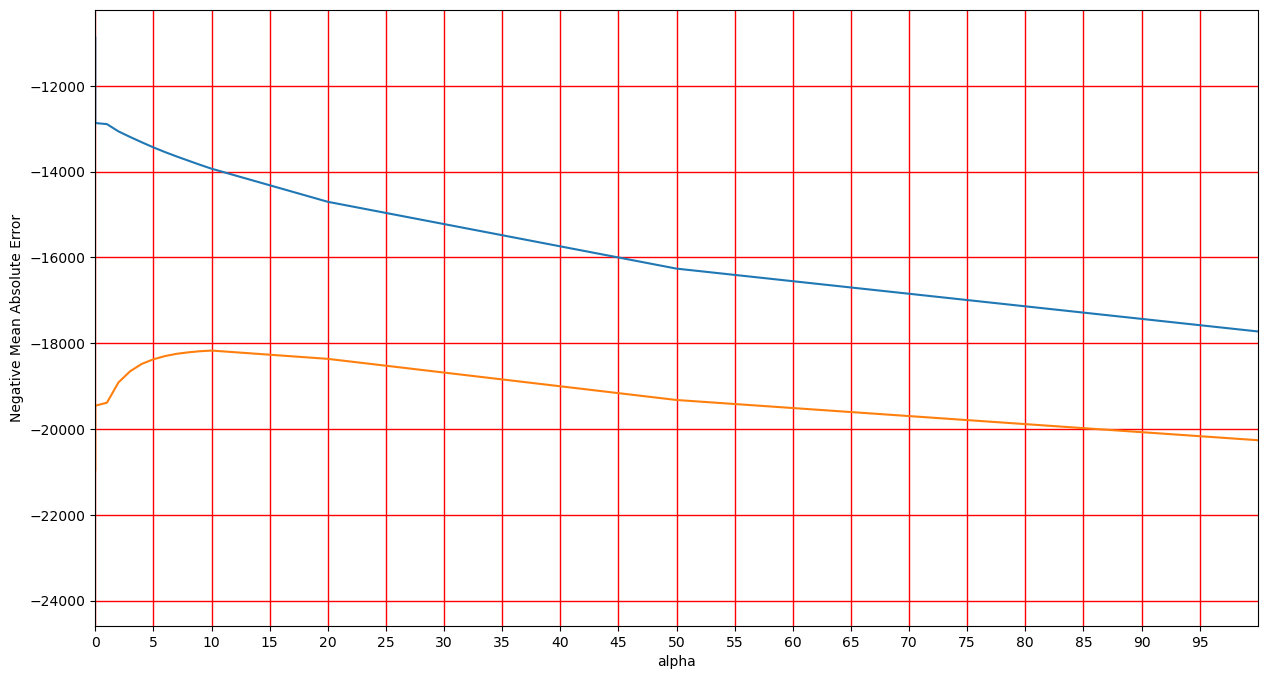

In [41]:
# Plotting the mean test and train scores

plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [42]:
# Setting alpha as 10, building a ridge regression model
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [43]:
# Predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.9102708640356321

In [44]:
# Predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.8291066996854972

In [45]:
# checking the parameters of the Ridge Regression model
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

-358194.5239439254


[(-358194.524, 'constant'),
 (28515.5, 'RoofMatl_WdShngl'),
 (27042.781, 'Neighborhood_StoneBr'),
 (26168.788, 'OverallQual_9'),
 (22527.234, 'OverallQual_10'),
 (-19902.873, 'LotShape_IR3'),
 (19301.559, 'Neighborhood_NoRidge'),
 (-18810.805, 'KitchenQual_TA'),
 (-16924.258, 'KitchenQual_Gd'),
 (16369.044, 'Neighborhood_NridgHt'),
 (-14978.203, 'BsmtQual_Gd'),
 (14543.394, 'GarageCars'),
 (-13867.62, 'KitchenAbvGr'),
 (-13766.146, 'ExterQual_TA'),
 (13573.273, 'Functional_Typ'),
 (-13396.392, 'OverallQual_5'),
 (-12943.325, 'Neighborhood_SWISU'),
 (-12790.392, 'OverallCond_3'),
 (-12514.357, 'Neighborhood_Edwards'),
 (-12487.347, 'OverallQual_6'),
 (-12376.7, 'Exterior1st_Stucco'),
 (12273.504, 'BsmtExposure_Gd'),
 (-12054.172, 'BsmtQual_TA'),
 (11970.053, 'Exterior1st_BrkFace'),
 (-11813.314, 'OverallQual_4'),
 (11724.814, 'Neighborhood_Crawfor'),
 (-11568.08, 'MSSubClass_120'),
 (-11562.375, 'BldgType_TwnhsE'),
 (11403.382, 'SaleCondition_Partial'),
 (-11392.264, 'OverallCond_4'),
 

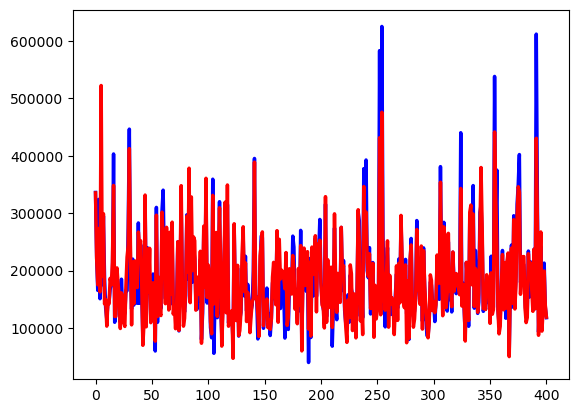

In [46]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_ridge, color='red', linewidth=2.5, linestyle='-')
plt.show()

***Performing Lasso Regression***

In [47]:

lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.498476      0.075643         0.006212        0.003250      0.0001   
1        0.486920      0.067599         0.008100        0.006940       0.001   
2        0.444543      0.034161         0.008524        0.007925        0.01   
3        0.498106      0.078334         0.001560        0.002053        0.05   
4        0.454079      0.066283         0.005622        0.004976         0.1   
5        0.475721      0.059053         0.000810        0.001040         0.2   
6        0.485952      0.073580         0.003133        0.006266         0.3   
7        0.466499      0.055020         0.003224        0.006448         0.4   
8        0.423365      0.037763         0.009054        0.007399         0.5   
9        0.495749      0.046909         0.006160        0.007548         0.6   
10       0.466361      0.046996         0.009489        0.007761         0.7   
11       0.421630      0.022837         0.007248        0.007062         0.8   
12       0.504433      0.044728         0.009126        0.007464         0.9   
13       0.470301      0.038783         0.009131        0.007473         1.0   
14       0.482089      0.024444         0.000632        0.001265         2.0   
15       0.493677      0.033765         0.003955        0.004952         3.0   
16       0.531784      0.040895         0.000943        0.001885         4.0   
17       0.486282      0.042375         0.004854        0.005923         5.0   
18       0.465197      0.030408         0.006765        0.007464         6.0   
19       0.482363      0.045247         0.010545        0.008727         7.0   
20       0.481346      0.034615         0.004015        0.006201         8.0   
21       0.426613      0.006004         0.003022        0.006045         9.0   
22       0.469638      0.041665         0.008157        0.006786        10.0   
23       0.475214      0.052009         0.009186        0.005415          20   
24       0.548883      0.078259         0.000000        0.000000          50   
25       0.517025      0.066360         0.007450        0.006404         100   
26       0.257119      0.035365         0.007531        0.006959         500   
27       0.107658      0.034057         0.004458        0.005937        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -21872.883161      -20088.635953   
1    {'alpha': 0.001}      -21870.794562      -20074.675015   
2     {'alpha': 0.01}      -21853.162042      -20047.047702   
3     {'alpha': 0.05}      -21805.446311      -19904.263144   
4      {'alpha': 0.1}      -21759.386859      -19888.283670   
5      {'alpha': 0.2}      -21699.148113      -19856.033439   
6      {'alpha': 0.3}      -21638.447900      -19831.606350   
7      {'alpha': 0.4}      -21578.067745      -19810.349482   
8      {'alpha': 0.5}      -21522.131199      -19789.656761   
9      {'alpha': 0.6}      -21469.545731      -19770.612170   
10     {'alpha': 0.7}      -21427.040904      -19751.129200   
11     {'alpha': 0.8}      -21388.046359      -19722.701194   
12     {'alpha': 0.9}      -21344.324047      -19690.553633   
13     {'alpha': 1.0}      -21299.769587      -19662.340839   
14     {'alpha': 2.0}      -20938.253218      -19428.697558   
15     {'alpha': 3.0}      -20751.629906      -19210.149685   
16     {'alpha': 4.0}      -20486.010928      -18986.219930   
17     {'alpha': 5.0}      -20196.741768      -18790.055690   
18     {'alpha': 6.0}      -19913.568916      -18618.399440   
19     {'alpha': 7.0}      -19714.630998      -18455.244132   
20     {'alpha': 8.0}      -19521.737784      -18300.560558   
21     {'alpha': 9.0}      -19348.550332      -18160.334466   
22    {'alpha': 10.0}      -19211.513226      -18044.908439   
23      {'alpha': 20}      -18227.471120      -17331.912624   
24      {'alpha': 50}      -17748.864261      -17407.376180   
25     {'alpha': 100}      -17732.648217     

In [49]:
model_cv.best_params_

{'alpha': 100}

In [50]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

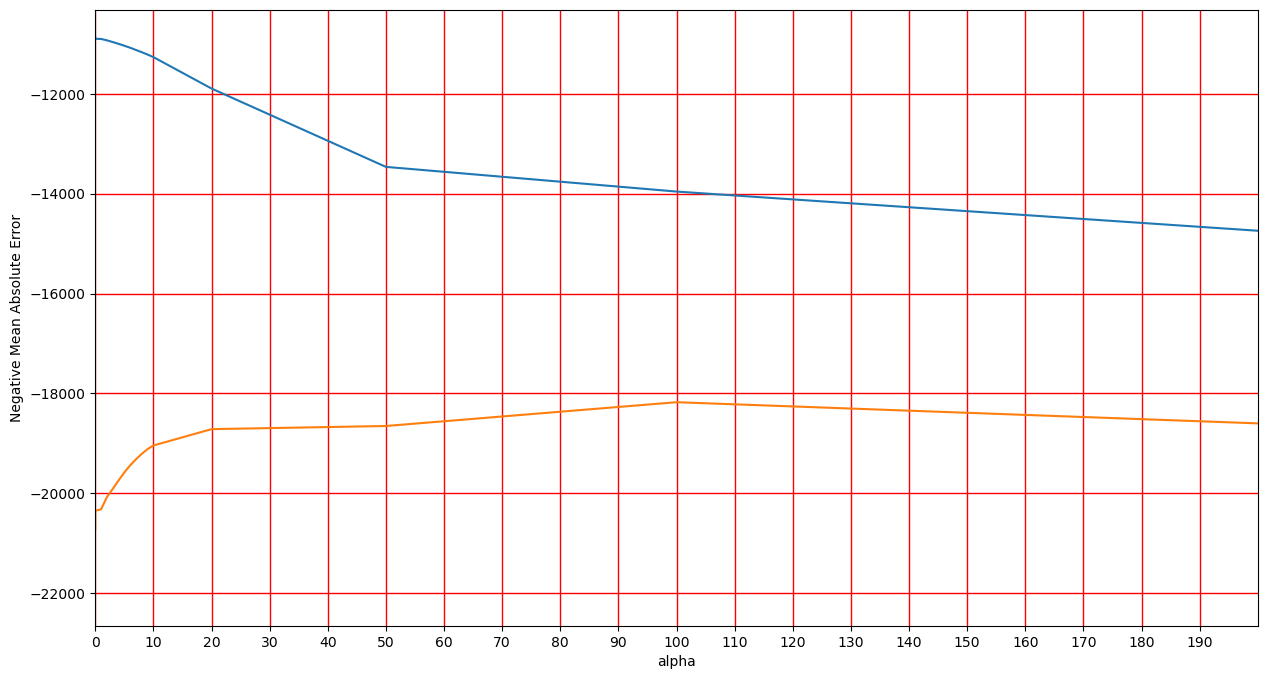

In [51]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [52]:
# Setting alpha as 100, building a lasso regression model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [53]:
# Setting alpha as 100, building a lasso regression model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [54]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.8226115465655931

In [55]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(-1587234.703, 'constant'),
 (70839.234, 'RoofMatl_WdShngl'),
 (53343.494, 'OverallQual_10'),
 (45121.688, 'OverallQual_9'),
 (-43831.323, 'LotShape_IR3'),
 (40420.806, 'Neighborhood_StoneBr'),
 (27555.031, 'Neighborhood_NoRidge'),
 (22722.148, 'SaleCondition_Partial'),
 (21939.529, 'Neighborhood_NridgHt'),
 (-20124.624, 'KitchenAbvGr'),
 (-19233.999, 'KitchenQual_TA'),
 (-18166.271, 'OverallCond_3'),
 (-16982.411, 'KitchenQual_Gd'),
 (-16743.144, 'OverallCond_4'),
 (-16647.628, 'Exterior1st_Stucco'),
 (15097.117, 'Neighborhood_Crawfor'),
 (-14228.874, 'BldgType_TwnhsE'),
 (13972.23, 'GarageCars'),
 (-13942.52, 'BsmtQual_Gd'),
 (13275.448, 'OverallQual_8'),
 (13116.707, 'BsmtExposure_Gd'),
 (-13116.102, 'Neighborhood_SWISU'),
 (12960.936, 'Functional_Typ'),
 (-12798.205, 'BldgType_Twnhs'),
 (11458.26, 'Exterior1st_BrkFace'),
 (-11107.081, 'BsmtQual_TA'),
 (-10888.329, 'Neighborhood_Edwards'),
 (10709.009, 'MSSubClass_70'),
 (10616.819, 'LotConfig_CulDSac'),
 (-10615.993, 'HouseStyle_2

In [56]:
lasso_selected_features

['RoofMatl_WdShngl',
 'OverallQual_10',
 'OverallQual_9',
 'LotShape_IR3',
 'Neighborhood_StoneBr',
 'Neighborhood_NoRidge',
 'SaleCondition_Partial',
 'Neighborhood_NridgHt',
 'KitchenAbvGr',
 'KitchenQual_TA',
 'OverallCond_3',
 'KitchenQual_Gd',
 'OverallCond_4',
 'Exterior1st_Stucco',
 'Neighborhood_Crawfor',
 'BldgType_TwnhsE',
 'GarageCars',
 'BsmtQual_Gd',
 'OverallQual_8',
 'BsmtExposure_Gd',
 'Neighborhood_SWISU',
 'Functional_Typ',
 'BldgType_Twnhs',
 'Exterior1st_BrkFace',
 'BsmtQual_TA',
 'Neighborhood_Edwards',
 'MSSubClass_70',
 'LotConfig_CulDSac',
 'HouseStyle_2Story',
 'BsmtQual_Fa',
 'Condition1_Feedr',
 'MSSubClass_120',
 'BsmtFinType1_GLQ',
 'BsmtFinType2_Rec',
 'HouseStyle_1Story',
 'OverallCond_5',
 'OverallQual_5',
 'SaleCondition_Alloca',
 'Exterior2nd_Wd Shng',
 'BsmtFinType1_Unf',
 'RoofMatl_CompShg',
 'SaleCondition_Normal',
 'Exterior2nd_Stucco',
 'OverallQual_4',
 'ExterQual_TA',
 'Fireplaces',
 'OverallQual_6',
 'GarageQual_Fa',
 'Neighborhood_Somerst',
 '

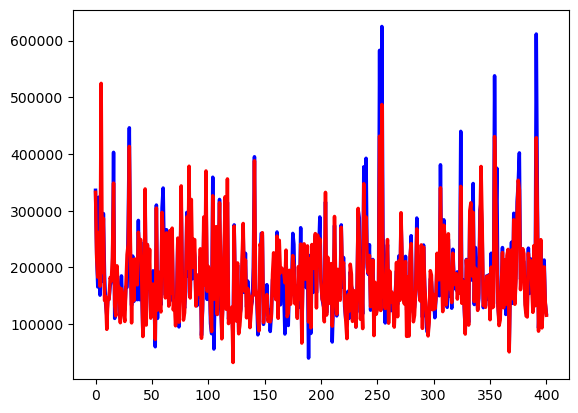

In [57]:
# Plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_lasso, color='red', linewidth=2.5, linestyle='-')
plt.show()

*****
***Conclusions:***

- from Scatter plots: Multiple variable show Linear trend with Sale Price
***

- GarageType - Most values are of type "Attchd" i.e. "Attached to home", so we replace NULL values with "Attchd"
- GarageFinish - Most values are of type "Unf" i.e. "Unfinished", so we replace NULL values with "Unf"
- GarageQual - Most values are of type "TA" i.e. "Typical/Average", so we replace NULL values with "TA"
- GarageCond - Most values are of type "TA" i.e. "Typical/Average", so we replace NULL values with "TA"
***

- BsmtQual - Most values are of type "TA", so we replace NULL values with "TA"
- BsmtCond - Most values are of type "TA", so we replace NULL values with "TA"
- BsmtExposure - Most values are of type "No", so we replace NULL values with "No"
- BsmtFinType1 - Most values are of type "Unf", so we replace NULL values with "Unf"
- BsmtFinType2 - Most values are of type "Unf", so we replace NULL values with "Unf"
***

Based on the r2_score of the 3 models, we can see that their r2_scores are almost similar, as such it is better to go for the simplest model. In this case it would be better to go with Lasso as it panalizes the variables, and helps in feature selection.
The optimum value of lambda for Ridge Regression comes out to be as 10 while the optimum value of lambda for Lasso Regression comes out to be 100.
The top 30 most important features using lasso are:

*****

In [58]:
for feature in lasso_selected_features[:31]:
    print(f"- {feature}")

- RoofMatl_WdShngl
- OverallQual_10
- OverallQual_9
- LotShape_IR3
- Neighborhood_StoneBr
- Neighborhood_NoRidge
- SaleCondition_Partial
- Neighborhood_NridgHt
- KitchenAbvGr
- KitchenQual_TA
- OverallCond_3
- KitchenQual_Gd
- OverallCond_4
- Exterior1st_Stucco
- Neighborhood_Crawfor
- BldgType_TwnhsE
- GarageCars
- BsmtQual_Gd
- OverallQual_8
- BsmtExposure_Gd
- Neighborhood_SWISU
- Functional_Typ
- BldgType_Twnhs
- Exterior1st_BrkFace
- BsmtQual_TA
- Neighborhood_Edwards
- MSSubClass_70
- LotConfig_CulDSac
- HouseStyle_2Story
- BsmtQual_Fa
- Condition1_Feedr


*****
From these we can understand the major features from the initials columns that influence the Sales Price
Some of the major influencers are:
1. OverallQual
2. OverAllCond
3. Neighborhood
4. KitchenQual
5. BsmtQual
6. SaleCondition
7. GarageCars